# 562. 1984 ✅

Вы - модератор чата, вам регулярно приходится удалять сообщения, содержащие нецензурную лексику. Дан список стоп-слов $𝐷, 10<∣𝐷∣<10^2,1≤∣𝐷_𝑖∣≤30$, вхождение любой комбинации которых должно подвергать сообщение блокировке.

Также вам даны сообщения $M, 10<∣M∣<10^4, 1≤∣M_i∣≤10^5$. Вам нужно определить для каждого из них, должно быть оно удалено или нет.

**Формат ввода**

В первой строке задается два числа $n,10≤n≤100$ − количество стоп-слов и $m,10≤m≤10^4$ − количество сообщений.

Далее идёт $n$ строк, на каждой из которых задается стоп-слово $𝐷_𝑖$, $1≤∣D_i∣≤30$, после чего на следующих $m$ строках задаются сообщения $M_i$, $1≤∣M_i∣≤10^5$, для каждого из которых необходимо определить, должно оно быть удалено или нет. Гарантируется, что суммарная длина всех $m$ строк не превышает $10^5$.

**Формат вывода**

В качестве ответа ваша программа должна вывести $m$ строк, на каждой из которых для сообщения, которое должно быть удалено, нужно вывести слово $DELETE$, в противном случае − слово $KEEP$.

In [ ]:
import sys
import string

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def main():
    D = set() # список стоп-слов

    # n - количество стоп-слов
    # m - количество сообщений
    n, m = map(int, input().split())

    # считываем список стоп слов
    for i in range(n):
        D.add(input().lower())

    results = []
    for i in range(m):
        M = input().strip().lower() # считываем сообщение и приводим в нижний регистр
        M = remove_punctuation(M) # удаляем все знаки пунктуации

        # Проверяем наличие любой комбинации стоп-слов в сообщении
        should_delete = any(stop_word in M for stop_word in D)

        if should_delete:
            results.append("DELETE")
        else:
            results.append("KEEP")

    for result in results:
        print(result)


if __name__ == '__main__':
    main()

3 5
bad
ugly
worse
This is a bad message
Nothing ugly here
Everything is fine
Worst case scenario
What could be worse?
DELETE
DELETE
KEEP
KEEP
DELETE


# 551. Точность меток ❌ - превышено время

Петя и Вася решили разметить $n$ объектов на несколько классов. Насколько у них получились согласованные метки?

Петя $i$-й объект отнес к классу $p_i (0≤p_i<n)$. Вася $i$-й объект отнес к классу $v_i (0≤v_i<n)$. Вычислите значение функции похожести набора меток:

$$
Similarity(p,v) = \frac{1}{2}\frac{\sum_{i=1}^{n}\sum_{j=1}^{i-1} I[p_i=p_j]=I[v_i=v_j]}{n(n-1)}
$$

где $I[exp]$ принимает значение $1$, если выражение $exp$ истинно, и $0$ иначе.

Другими словами, значение $Similarity(p,v)$ равно доле пар различных индексов $(i,j)$, для которых и Петя, и Вася одинаково определили принадлежность одному классу.

**Формат ввода**

В первой строке записано одно целое число $n (2≤n≤1000000)$.

Во второй строке записаны $n$ целых чисел $p_1, p_2, ..., p_n$.

В третье й строке записаны $n$ целых чисел $v_1, v_2, ..., v_n$.

**Формат вывода**

Выведите ответ в виде несократимой дроби *P/Q* (без пробелов).

**Ограничения**

Ограничение времени - 10 с

Ограничение памяти - 1 ГБ

***Пояснение***

- Последовательности $p$ и $v$ - это две последовательности длиной $n$.

- Двойная сумма $\sum_{i=1}^{n}\sum_{j=1}^{i-1}$ - это двойная сумма, которая идет по всем парам индексов $(i,j)$, где $i$ и $j$ являются индексами в последовательностях $p$ и $v$, и $j$ всегда меньше $i$ (то есть $(i,j)$ пробегает по всем возможным парам с $i>j$).

- Индикационные функции: $I[p_i=p_j]$ - это индикаторная функция, которая принимает значение 1, если элемент $p_i$ равен элементу $p_j$, и 0 в противном случае. $I[v_i=v_j]$ - аналогичная индикаторная функция для последовательности $v$.

- Сравнение индикаторных функций: I[p_i=p_j]=I[v_i=v_j] - это логическое выражение, которое проверяет, равны ли друг другу индикаторные функции. Оно возвращает 1, если $p_i$ равно $p_j$ и $v_i$ равно $v_j$, либо если $p_i$ не равно $p_j$ и $v_i$ не равно $v_j$. В противном случае возвращает 0.

- Сумма совпадений (двойная сумма):эта сумма подсчитывает количество пар индексов $(i,j)$, для которых индикаторные функции равны, то есть, подсчитывает количество совпадений в паттернах равенства и неравенства между парами элементов последовательностей $p$ и $v$.

- Нормализация: $\frac{1}{n(n−1)}$ - нормировочный коэффициент, который делит сумму на общее количество пар (то есть на количество всех возможных индексов $(i,j)$, где $i>j$). $\frac{1}{2}$  - дополнительный коэффициент для приведения меры в диапазон от 0 до 1.

Возьмем для примера:

```
n = 5
p=[1,1,2,2,2]
v=[3,3,3,4,4]
```

**Шаг 1**: Подсчет совпадений индикаторных функций

Пары индексов $(i,j)$:
- $(i=2,j=1)$
- $(i=3,j=1)$
- $(i=3,j=2)$
- $(i=4,j=1)$
- $(i=4,j=2)$
- $(i=4,j=3)$
- $(i=5,j=1)$
- $(i=5,j=2)$
- $(i=5,j=3)$
- $(i=5,j=4)$

**Шаг 2**: Проверка индикаторных функций для каждой пары

- $(i=2,j=1)$

$I[p_2=p_1] = I[1=1] = 1$ <br>
$I[v_2=v_1] = I[3=3] = 1$ <br>

Совпадают: $1=1$ (добавляем 1 к сумме).

- $(i=3,j=1)$

$I[p_3=p_1] = I[2=1] = 0$ <br>
$I[v_3=v_1] = I[3=3] = 1$ <br>

Не совпадают: $0≠1$ (добавляем 0 к сумме)

- $(i=3,j=2)$

$I[p_3=p_2] = I[2=1] = 0$ <br>
$I[v_3=v_2] = I[3=3] = 1$ <br>

Не совпадают: $0≠1$ (добавляем 0 к сумме)

- $(i=4,j=1)$

$I[p_4=p_1] = I[2=1] = 0$ <br>
$I[v_4=v_1] = I[4=3] = 0$ <br>

Cовпадают: $0=0$ (добавляем 1 к сумме)

- $(i=4,j=2)$

$I[p_4=p_2] = I[2=1] = 0$ <br>
$I[v_4=v_2] = I[4=3] = 0$ <br>

Cовпадают: $0=0$ (добавляем 1 к сумме)

- $(i=4,j=3)$

$I[p_4=p_3] = I[2=2] = 1$ <br>
$I[v_4=v_3] = I[4=3] = 0$ <br>

Не совпадают: $1≠0$ (добавляем 0 к сумме)

- $(i=5,j=1)$

$I[p_5=p_1] = I[2=1] = 0$ <br>
$I[v_5=v_1] = I[4=3] = 0$ <br>

Совпадают: $0=0$ (добавляем 1 к сумме)

- $(i=5,j=2)$

$I[p_5=p_2] = I[2=1] = 0$ <br>
$I[v_5=v_2] = I[4=3] = 0$ <br>

Совпадают: $0=0$ (добавляем 1 к сумме)

- $(i=5,j=3)$

$I[p_5=p_3] = I[2=2] = 1$ <br>
$I[v_5=v_3] = I[4=3] = 0$ <br>

Совпадают: $1≠0$ (добавляем 0 к сумме)

- $(i=5,j=4)$

$I[p_5=p_4] = I[2=2] = 1$ <br>
$I[v_5=v_4] = I[4=4] = 1$ <br>

Совпадают: $1=1$ (добавляем 1 к сумме)

**Шаг 3**: Подсчет суммы совпадений

**Итого сумма = 6**

**Шаг 4**: Нормализация

*По формуле, не совсем корректно по-моему, но по сути, нам чтобы найти долю, надо количество совпавших пар поделить на общее количество пар, а общее кол-во пар вычисляется как:

$$
allpairs = \frac{n(n-1)}{2} = \frac{5(5-1)}{2} = 10
$$

P.s. почему $n(n-1)$ в знаменателе, я хз, может что-то непоняла.

Итого:

$$
Similarity(p,v) = \frac{6}{10} = \frac{3}{5}
$$

$$
Similarity(p,v) = \frac{1}{2}\frac{\sum_{i=1}^{n}\sum_{j=1}^{i-1} I[p_i=p_j]=I[v_i=v_j]}{n(n-1)}
$$


## Код для генерации примеров

In [ ]:
import numpy as np

def generate_examples(n, num_classes=10):
    """
    Генерирует два списка меток классов длиной n.

    Args:
    - n: Длина списков (2 ≤ n ≤ 1 000 000).
    - num_classes: Количество различных классов (по умолчанию 10).

    Returns:
    - p: Список меток классов длиной n.
    - v: Список меток классов длиной n.
    """
    # Генерируем случайные метки классов для списков p и v
    p = np.random.randint(0, num_classes, size=n)
    v = np.random.randint(0, num_classes, size=n)

    return p.tolist(), v.tolist()

# Пример использования
n = 10
p, v = generate_examples(n, num_classes=n-1)
print("p:", p)
print("v:", v)

p: [7, 5, 1, 2, 0, 3, 4, 2, 1, 8]
v: [7, 4, 7, 3, 4, 2, 3, 5, 4, 8]


In [ ]:
!pip install memory_profiler

## 1.1. Верное решение, но не влезает по времени

In [ ]:
from fractions import Fraction
from memory_profiler import profile

@profile
def similarity(p, v):
    n = len(p)
    matching_pairs = 0
    all_pairs = n * (n - 1) // 2

    for i in range(n):
        for j in range(i):
            if (p[i] == p[j]) == (v[i] == v[j]):
                matching_pairs += 1

    similarity_fraction = Fraction(matching_pairs, all_pairs)
    print(f"{frac.numerator}/{frac.denominator}")
    return similarity_fraction

# n = int(input())
# p = list(map(int, input().split()))
# v = list(map(int, input().split()))

# frac = similarity(p, v)
# print(f"{frac.numerator}/{frac.denominator}")

## 1.2. Попытки другого решения через NumPy

In [ ]:
# решение через numpy
from memory_profiler import profile

import numpy as np
from fractions import Fraction

@profile
def similarity_by_NumPy(p, v, n):

    # Создаем массивы из списков p и v
    p = np.array(p)
    v = np.array(v)
    # все возможные пары
    all_pairs = n * (n - 1) // 2

    # Создаем матрицы совпадений для p и v
    p_equal = np.equal.outer(p, p)
    v_equal = np.equal.outer(v, v)

    # Считаем количество совпадений пар (i, j), для которых (p[i] == p[j]) == (v[i] == v[j])
    matching_pairs = np.sum(np.tril(p_equal == v_equal, -1))

    similarity = Fraction(matching_pairs, all_pairs)
    print(f"{frac.numerator}/{frac.denominator}")
    return similarity

## Тестирование

In [ ]:
# сгенерируем рандомные значения

n = 10000
p, v = generate_examples(n, num_classes=20)
print("p:", p)
print("v:", v)

p: [14, 17, 11, 3, 0, 12, 1, 8, 10, 11, 10, 19, 5, 17, 17, 12, 13, 19, 8, 4, 7, 17, 6, 16, 0, 16, 7, 9, 17, 18, 4, 3, 3, 6, 17, 5, 8, 0, 9, 11, 14, 11, 14, 0, 6, 6, 14, 18, 15, 11, 12, 19, 3, 14, 9, 4, 16, 14, 14, 7, 14, 1, 14, 5, 8, 19, 7, 15, 6, 3, 15, 3, 8, 13, 4, 19, 17, 7, 7, 13, 5, 11, 18, 3, 13, 5, 16, 19, 3, 0, 7, 12, 7, 13, 2, 11, 14, 1, 4, 8, 12, 6, 10, 4, 1, 18, 8, 9, 2, 7, 7, 12, 7, 2, 4, 15, 19, 18, 19, 3, 9, 13, 13, 9, 18, 13, 9, 18, 8, 7, 18, 8, 16, 6, 19, 11, 18, 4, 9, 15, 11, 18, 14, 13, 10, 13, 0, 2, 17, 9, 0, 10, 14, 13, 10, 19, 17, 19, 14, 13, 16, 5, 4, 15, 14, 13, 8, 14, 18, 8, 6, 9, 16, 12, 4, 10, 5, 9, 17, 1, 6, 3, 1, 5, 11, 6, 8, 19, 12, 0, 8, 0, 0, 2, 9, 17, 10, 4, 5, 6, 17, 12, 3, 13, 9, 7, 3, 19, 4, 0, 15, 19, 12, 13, 16, 10, 0, 18, 8, 8, 2, 19, 0, 17, 19, 14, 0, 11, 5, 14, 10, 0, 3, 15, 6, 18, 17, 16, 2, 6, 9, 17, 11, 1, 18, 16, 13, 11, 9, 9, 18, 9, 3, 14, 10, 13, 4, 16, 16, 0, 16, 7, 10, 7, 14, 7, 4, 3, 5, 15, 7, 12, 0, 17, 7, 13, 16, 1, 15, 6, 0, 14, 13, 1

In [ ]:
%%time
# с верным решением из п. 1.1.
%load_ext memory_profiler
%mprun -f similarity similarity(p, v)


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/local/lib/python3.10/dist-packages/memory_profiler.py", line 847, in enable
    sys.settrace(self.trace_memory_usage)



ERROR: Could not find file <ipython-input-5-5f014a89356a>
NOTE: %mprun can only be used on functions defined in physical files, and not in the IPython environment.



PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/local/lib/python3.10/dist-packages/memory_profiler.py", line 850, in disable
    sys.settrace(self._original_trace_function)



NameError: name 'frac' is not defined

In [ ]:
%%time
# 1.2. Попытки другого решения через NumPy
# превышает память :(

%load_ext memory_profiler
%mprun -f similarity_by_NumPy similarity_by_NumPy(p, v, n)

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
ERROR: Could not find file <ipython-input-6-9cbb97722f06>
NOTE: %mprun can only be used on functions defined in physical files, and not in the IPython environment.


NameError: name 'frac' is not defined

In [ ]:
# Пример
# n = 5
# p = [1, 1, 2, 2, 2]
# v = [3, 3, 3, 4, 4]

n = 3
p=[1,2,0]
v=[0,2,1]

frac = calculate_similarity(p, v, n)
print(f"{frac.numerator}/{frac.denominator}")

In [ ]:
n = 5
p=[1,1,2,2,2]
v=[3,3,3,4,4]

for i in range(n):
    for j in range(i):
        print(f'Indexes: {i+1}, {j+1} and Pairs: {p[i]},  {p[j]} | {v[i]}, {v[j]}')

Indexes: 2, 1 and Pairs: 1,  1 | 3, 3
Indexes: 3, 1 and Pairs: 2,  1 | 3, 3
Indexes: 3, 2 and Pairs: 2,  1 | 3, 3
Indexes: 4, 1 and Pairs: 2,  1 | 4, 3
Indexes: 4, 2 and Pairs: 2,  1 | 4, 3
Indexes: 4, 3 and Pairs: 2,  2 | 4, 3
Indexes: 5, 1 and Pairs: 2,  1 | 4, 3
Indexes: 5, 2 and Pairs: 2,  1 | 4, 3
Indexes: 5, 3 and Pairs: 2,  2 | 4, 3
Indexes: 5, 4 and Pairs: 2,  2 | 4, 4


In [ ]:
import numpy as np

n = 5
p=[1,1,2,2,2]
v=[3,3,3,4,4]

# n = 3
# p=[1,2,0]
# v=[0,2,1]

p = np.array(p)
v = np.array(v)

# Создаем матрицы совпадений для p и v
p_equal = np.equal.outer(p, p)
v_equal = np.equal.outer(v, v)

p_equal

array([[ True,  True, False, False, False],
       [ True,  True, False, False, False],
       [False, False,  True,  True,  True],
       [False, False,  True,  True,  True],
       [False, False,  True,  True,  True]])

In [ ]:
import numpy as np

def extract_upper_triangle_elements(matrix):
    # Извлекаем верхнюю треугольную часть матрицы (исключая диагональ)
    upper_triangle = np.triu(matrix, k=1)
    print(upper_triangle)
    # Преобразуем её в одномерный вектор
    upper_triangle_elements = upper_triangle[upper_triangle != 0]
    return upper_triangle_elements

# Пример данных
p = np.array([1,1,2,2,2])
p_equal = np.equal.outer(p, p)

# Извлечение элементов выше диагонали
upper_triangle_elements = extract_upper_triangle_elements(p_equal)
print(upper_triangle_elements)

[[False  True False False False]
 [False False False False False]
 [False False False  True  True]
 [False False False False  True]
 [False False False False False]]
[ True  True  True  True]


In [ ]:
import numpy as np

# Полная матрица
matrix = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25]
])

# Матрица с нулями
matrix_with_zeros = np.array([
    [0, 2, 3, 4, 5],
    [0, 0, 8, 9, 10],
    [0, 0, 0, 14, 15],
    [0, 0, 0, 0, 20],
    [0, 0, 0, 0, 0]
])

print("Размер полной матрицы:", matrix.nbytes, "байт")
print("Размер матрицы с нулями:", matrix_with_zeros.nbytes, "байт")

Размер полной матрицы: 200 байт
Размер матрицы с нулями: 200 байт


In [ ]:
# решение через numpy
import numpy as np
from fractions import Fraction

def calculate_similarity(p, v, n):

    # Создаем массивы из списков p и v
    p = np.array(p)
    v = np.array(v)
    # все возможные пары
    all_pairs = n * (n - 1) // 2

    # Создаем матрицы совпадений для p и v
    p_equal = np.equal.outer(p, p)
    v_equal = np.equal.outer(v, v)

    # Считаем количество совпадений пар (i, j), для которых (p[i] == p[j]) == (v[i] == v[j])
    matching_pairs = np.sum(np.tril(p_equal == v_equal, -1))

    similarity = Fraction(matching_pairs, all_pairs)
    return similarity

# Пример
# n = 5
# p = [1, 1, 2, 2, 2]
# v = [3, 3, 3, 4, 4]

n = 3
p=[1,2,0]
v=[0,2,1]

frac = calculate_similarity(p, v, n)
print(f"{frac.numerator}/{frac.denominator}")

1/1


In [ ]:
from collections import defaultdict

# Словари для подсчета количества вхождений и парных вхождений
count_p = defaultdict(int)
count_v = defaultdict(int)
pair_count_p = defaultdict(int)
pair_count_v = defaultdict(int)

# Подсчет количества каждого класса
for i in range(n):
    count_p[p[i]] += 1
    count_v[v[i]] += 1

# Подсчет количества парных вхождений
for key, count in count_p.items():
    pair_count_p[key] = count * (count - 1) // 2

for key, count in count_v.items():
    pair_count_v[key] = count * (count - 1) // 2

# Подсчет совпадений парных вхождений
matching_pairs = 0
for key in pair_count_p:
    matching_pairs += min(pair_count_p[key], pair_count_v.get(key, 0))

# Итоговый расчет
total_pairs = n * (n - 1) // 2
similarity = (1 / 2) * (matching_pairs / total_pairs)

similarity

0.0

In [ ]:
# n = 5
# p=[1,1,2,2,2]
# v=[3,3,3,4,4]

n = 3
p=[1,2,0]
v=[0,2,1]

# 3
# 1 2 0
# 0 2 1

matching_pairs = 0
for i in range(n):
    for j in range(i):
        if (p[i] == p[j]) == (v[i] == v[j]):
            matching_pairs += 1

matching_pairs

3

In [ ]:
from fractions import Fraction
from collections import defaultdict

def similarity(p, v):
    n = len(p)

    # Словари для подсчета частоты
    p_count = defaultdict(int)
    v_count = defaultdict(int)
    p_v_count = defaultdict(int)

    # Подсчет частоты меток
    for pi, vi in zip(p, v):
        p_count[pi] += 1
        v_count[vi] += 1
        p_v_count[(pi, vi)] += 1

    # Подсчет пар для каждой метки
    def count_pairs(count):
        return count * (count - 1) // 2

    matching_pairs = 0

    # Считаем пары (i, j) для пэтевских меток
    for count in p_count.values():
        matching_pairs += count_pairs(count)

    # Считаем пары (i, j) для васинских меток
    for count in v_count.values():
        matching_pairs += count_pairs(count)

    # Считаем пары (i, j) для одинаковых меток (i, j) в обоих словарях
    for count in p_v_count.values():
        matching_pairs -= count_pairs(count)

    # Общее количество пар
    all_pairs = n * (n - 1) // 2

    similarity_fraction = Fraction(matching_pairs * 2, all_pairs)
    return similarity_fraction

# Ввод данных
n = int(input())
p = list(map(int, input().split()))
v = list(map(int, input().split()))

# Вычисление и вывод результата
frac = similarity(p, v)
print(f"{frac.numerator}/{frac.denominator}")

# 5
# 1 1 2 2 2
# 3 3 3 4 4

# 3
# 1 2 0
# 0 2 1

# 2
# 1 1
# 0 1

5
1 1 2 2 2
3 3 3 4 4
6/5


In [ ]:
%%time
from fractions import Fraction

def similarity(p, v):
    n = len(p)
    matching_pairs = 0
    all_pairs = n * (n - 1) // 2

    for i in range(n):
        for j in range(i):
            if (p[i] == p[j]) == (v[i] == v[j]):
                matching_pairs += 1

    similarity_fraction = Fraction(matching_pairs, all_pairs)
    return similarity_fraction

n = int(input())
p = list(map(int, input().split()))
v = list(map(int, input().split()))

frac = similarity(p, v)
print(f"{frac.numerator}/{frac.denominator}")

# Пример
# 5
# 1 1 2 2 2
# 3 3 3 4 4
# Ответ
# 3/5

5
1 1 2 2 2
3 3 3 4 4
3/5
CPU times: user 164 ms, sys: 31.1 ms, total: 195 ms
Wall time: 9.32 s


# 552. Тандемная конкатенация ❌ - превышено время

Тандем - это строка четной длины, у которой левая и правая половины равны.

Дан набор из $n$ строк $(1≤n≤10^5)$. Найдите среди них такие пары, которые при конкатенации дают тандем. Более формально, найдите все пары $(i,j)$ такие, что $i≠j$ и строка $s_i + s_j$ является тандемом.

Выведите все упорядоченные пары индексов (нумерация с единицы).

**Формат ввода**

В первой строке дано целое число $n (1≤n≤100000)$ − количество строк.

Далее в $n$ строках записано по одному слову. Длина каждого слова от 1 до 10. Слова состоят из маленьких букв английского алфавита.

**Формат вывода**

Выведите все упорядоченные пары индексов (нумерация с единицы).

**Примечание**

Генерация тестов (кроме примеров из условия)

Для генерации тестов использовался следующий алгоритм:

- выбираются два числа $n (1≤n≤111000)$ и $k (2≤k≤26)$
- выбираются $k$ различных символа английского алфавита
- генерируются $n$ строк: сначала выбирается длина $l$ от 1 до 10 с равномерным распределением, затем генерируется строка из выбранных символов и длины $l$
- оставляем только уникальные строки (если их более $100000$, то $100000$ случайных)

In [ ]:
import random
import string

def generate_test(n, k):
    # Выбираем k различных символов английского алфавита
    chosen_chars = random.sample(string.ascii_lowercase, k)

    generated_strings = set()
    while len(generated_strings) < n:
        # Выбираем случайную длину строки l от 1 до 10
        l = random.randint(1, 10)
        # Генерируем случайную строку из выбранных символов и длины l
        random_string = ''.join(random.choices(chosen_chars, k=l))
        generated_strings.add(random_string)

    # Превращаем набор уникальных строк в список и обрезаем до 100000, если их больше
    generated_strings = list(generated_strings)[:100000]

    return generated_strings

# Пример использования
n = 50 # 111000  # Максимальное значение n по условию
k = random.randint(2, 26)  # Случайное k от 2 до 26

strings_1 = generate_test(n, k)

# Выводим результат
print(len(strings_1))
# strings_1

50


In [ ]:
import random
strings_2 = ['abcd', 'abcd', 'efgh', 'efgh', 'hello', 'world', 'world', 'helloworld', 'worldhello', 'xy', 'yx', 'yxyx', 'tan', 'dem', 'tan', 'demtan', 'dem', 'tandem', 'ab', 'cd', 'ab', 'cd', 'abcd', 'cdab']

strings = sorted(strings_1+strings_2, key=lambda x: random.random())

# strings

In [ ]:
%%time

for i, j in list(permutations(list(range(len(strings))), 2)):
    res = strings[i] + strings[j]
    if res[:len(res)//2] == res[len(res)//2:]:
        print(i+1, j+1, strings[i], strings[j])
# Wall time: 30.6 ms

10 21 abcd abcd
10 26 abcd abcd
21 10 abcd abcd
21 26 abcd abcd
23 38 ab ab
25 41 dem dem
26 10 abcd abcd
26 21 abcd abcd
28 35 efgh efgh
29 36 cd cd
35 28 efgh efgh
36 29 cd cd
38 23 ab ab
41 25 dem dem
58 65 world world
60 61 tan tan
61 60 tan tan
65 58 world world
CPU times: user 22.4 ms, sys: 0 ns, total: 22.4 ms
Wall time: 30.6 ms


In [ ]:
%%time

for i in range(len(strings)):
    for j in range(len(strings)):
        combined = strings[i] + strings[j]
        if (i != j) and (combined[:len(combined) // 2] == combined[len(combined) // 2:]):
            print(i + 1, j + 1)
# Wall time: 21.2 ms

10 21
10 26
21 10
21 26
23 38
25 41
26 10
26 21
28 35
29 36
35 28
36 29
38 23
41 25
58 65
60 61
61 60
65 58
CPU times: user 19.3 ms, sys: 0 ns, total: 19.3 ms
Wall time: 18.4 ms


In [ ]:

from itertools import permutations

n = int(input())

s = []
for i in range(n):
    s.append(input())

for i, j in list(permutations(list(range(n)), 2)):
    res = s[i] + s[j]
    if res[:len(res)//2] == res[len(res)//2:]:
        print(i+1, j+1)

'koo'

In [ ]:
from collections import defaultdict

s = ['tan', 'dem', 'tandemtan', 'demtandem']
n = len(s)
# Заполняем словарь строками
string_dict = defaultdict(list)

# Заполняем словарь строками
for i, s in enumerate(s):
    string_dict[s].append(i + 1)

string_dict

defaultdict(list, {'tan': [1], 'dem': [2], 'tandemtan': [3], 'demtandem': [4]})

In [ ]:
# Проверяем каждую строку с каждой другой строкой в словаре
n = 4
s = ['tan', 'dem', 'tandemtan', 'demtandem']

for i in range(n):
    for j in range(n):
        if i != j:
            s1 = s[i]
            s2 = s[j]
            combined = s1 + s2
            half = len(combined) // 2
            if combined[:half] == combined[half:]:
                print(i + 1, j + 1)

1 4
2 3
3 2
4 1


In [ ]:
def find_tandem_pairs(strings):

    n = len(strings)
    string_dict = {}

    # Заполняем словарь строками
    for i, s in enumerate(strings):
        string_dict[s].append(i + 1)

    results = []

    # Проходим по каждой строке
    for i, s in enumerate(strings):
        reversed_s = s[::-1]  # Находим реверс строки

        if reversed_s in string_dict:
            for j in string_dict[reversed_s]:
                if i + 1 != j:
                    results.append((i + 1, j))

    return results

# Чтение входных данных
n = int(input())
# strings = [input().strip() for _ in range(n)]
s = ['tan', 'dem', 'tandemtan', 'demtandem']

# Получение результатов
results = find_tandem_pairs(s)
print("Res:", results)
# Вывод результатов
for pair in results:
    print(pair[0], pair[1])

4
Res: []


## Заново

Давай попробуем от ограничений:

1. Во-первых, тендем строка четной длинны, т.е. это строки:
    - четная длиная + четная длина
    - нечетная длина + нечетная длина

Гипотеза: что если разделить исходный массив на две группы, и внутри каждой группы уже тем же двойным циклом пройтись, будет быстрее.

*UPD :Эта гипотеза тоже не подходит. Потому что в худщем случае, все слова могут быть чётной длинны (или нечётной), а это значит проход по всему массиву, т.е. $O(n^2)$.*

In [ ]:
words = ['tan', 'dem', 'tandemtan', 'demtandem', 'nat']

backward, res = {}, []
for i, word in enumerate(words):
    backward[word] = i

print(backward)

for i, word in enumerate(words):
    print(i, word)
    if word in backward and backward[word] != i:
            res.append([i, backward[word]])

res

{'tan': 0, 'dem': 1, 'tandemtan': 2, 'demtandem': 3, 'nat': 4}
0 tan
1 dem
2 tandemtan
3 demtandem
4 nat


[]

In [ ]:
def palindromePairs(words):
    backward, res = {}, []
    for i, word in enumerate(words):
        backward[word[::-1]] = i

    for i, word in enumerate(words):

        if word in backward and backward[word] != i:
            res.append([i, backward[word]])

        if word != "" and "" in backward and word == word[::-1]:
            res.append([i, backward[""]])
            res.append([backward[""], i])

        for j in range(len(word)):
            if word[j:] in backward and word[:j] == word[j-1::-1]:
                res.append([backward[word[j:]], i])
            if word[:j] in backward and word[j:] == word[:j-1:-1]:
                res.append([i, backward[word[:j]]])

    return res

In [ ]:
dict1 = [{'a': 1, 'b': 2, 'c': 3}, {'a': 1, 'b': 2, 'd': 3}]
dict2 = {'c': 2, 'a': 1, 'c': 3}

if dict2 in dict1:
    print('yes')

не вышло((

Гипотеза:

Если попробовать следующий подход:

1. Допустим у меня есть словарь со всеми исходными словами, пока не знаю как он в точности должен выглядеть:
    - может быть просто `{'tan': 0, 'dem': 1, 'tandemtan': 2, 'demtandem': 3, 'nat': 4}` (т.е. слово и его индекс)
    - или может нужно хранить не слова, а набор букв в слове в виде `set()`, так как чтобы образовать тандем слова не должны быть индентичны, но если допустим в s1 есть буквы, которых нет в s2 - то (s1+s2) тандем образовать не смогут. Например: `{{'t','a','n': 0, {'d','e','m'}: 1, {'a', 'd', 'e', 'm', 'n', 't'}: 2, {'a', 'd', 'e', 'm', 'n', 't'}:3 , {'a', 'n', 't'}:4}`

2. Делаем один проход по массиву слов:
    - проверяем есть подходящее другое слово из словаря например так: `word in dict` (без второго цикла, а просто вхождением).
    - если есть можно найти индекс второго слова по ключу
    - но с другой стороны набор букв не всегда будет полностью идентичен набору букв в словоре, достаточно, чтобы все буквы из слова s1 были в s2, но при этом в s2 могут быть и другие буквы, тандем все равно возможно образовать, просто нужна доп проверка именно на половины уже. Например:
    ```
    s1 = 'tan'
    s = 'demtandem'
    ```

In [ ]:
def palindromePairs(words):
    ans = []   # initialize a list to store the palindrome pairs
    dict = {word[::-1]: i for i, word in enumerate(words)}  # create a dictionary to store the reverse of words and their indices

    for i, word in enumerate(words):  # iterate through the words and their indices
        # if "" in dict and dict[""] != i and word == word[::-1]:  # check if empty string is in the dictionary and the current word is palindrome
        # ans.append([i, dict[""]])  # append the indices to the ans list

        for j in range(1, len(word) + 1):  # iterate through the word characters
            l = word[:j]  # get the left substring
            r = word[j:]  # get the right substring
            if l in dict and dict[l] != i and r == r[::-1]:  # check if left substring is in the dictionary and the right substring is palindrome
                ans.append([i, dict[l]])  # append the indices to the ans list
            if r in dict and dict[r] != i and l == l[::-1]:  # check if right substring is in the dictionary and the left substring is palindrome
                ans.append([dict[r], i])  # append the indices to the ans list

    return ans  # return the ans list

words = ['tan', 'dem', 'tandemtan', 'demtandem', 'nat']
palindromePairs(words)

[[0, 4], [4, 0]]

In [ ]:
words = ['tandemtan', 'demtandem', 'tan', 'dem']

dict_words = {word: i for i, word in enumerate(words)}
print(dict_words)
ans = []

for i, word in enumerate(words):
    print(f'i: {i}, word: {word}')

    for j in range(1, len(word) + 1):
        l = word[:j]  # get the left substring
        r = word[j:]  # get the right substring
        if l in dict_words and dict_words[l] != i:
            print('l:', l, dict_words[l])
            ans.append([i+1, dict_words[l]+1])
        if r in dict_words and dict_words[r] != i:
            print('r:', r, dict_words[r])
            ans.append([dict_words[r]+1, i+1])
    print('_______________________________')
ans

{'tandemtan': 0, 'demtandem': 1, 'tan': 2, 'dem': 3}
i: 0, word: tandemtan
l: tan 2
r: tan 2
_______________________________
i: 1, word: demtandem
l: dem 3
r: dem 3
_______________________________
i: 2, word: tan
_______________________________
i: 3, word: dem
_______________________________


[[1, 3], [3, 1], [2, 4], [4, 2]]

In [ ]:
1 4
2 3
3 2
4 1

In [ ]:
from collections import Counter

def numOfPairs(nums, target):
        prefix, suffix = Counter(), Counter()
        cnt = 0
        for num in nums:
            if target.startswith(num):
                cnt += suffix[len(target) - len(num)]
            if target.endswith(num):
                cnt += prefix[len(target) - len(num)]
            if target.startswith(num):
                prefix[len(num)] += 1
            if target.endswith(num):
                suffix[len(num)] += 1
        return cnt

[]
[(0, 'tan'), (1, 'dem'), (2, 'tandemtan'), (3, 'demtandem')]
1 4
2 3
3 2
4 1


In [ ]:
# рабочее решение

# n = int(input())
n = 5
strings = ['tan', 'dem', 'tandemtan', 'demtandem']
# for i in range(n):
#     strings.append(input())

for i in range(len(strings)):
    for j in range(len(strings)):
        combined = strings[i] + strings[j]
        if (i != j) and (combined[:len(combined) // 2] == combined[len(combined) // 2:]):
            print(i + 1, j + 1)

1 4
2 3
3 2
4 1


In [ ]:
words = ['tan', 'dem', 'tandemtan', 'demtandem']
backward, res = {}, []
for i, word in enumerate(words):
    backward[word[::-1]] = i

backward

{'nat': 0, 'med': 1, 'natmednat': 2, 'mednatmed': 3}

In [ ]:
def tandemPairs(words):
    backward, res = {}, []
    for i, word in enumerate(words):
        backward[word[::-1]] = i

    for i, word in enumerate(words):

        if word in backward and backward[word] != i:
            res.append([i, backward[word]])

        if word != "" and "" in backward and word == word[::-1]:
            res.append([i, backward[""]])
            res.append([backward[""], i])

        for j in range(len(word)):
            if word[j:] in backward and word[:j] == word[j-1::-1]:
                res.append([backward[word[j:]], i])
            if word[:j] in backward and word[j:] == word[:j-1:-1]:
                res.append([i, backward[word[:j]]])

    return res

words = ['tan', 'dem', 'tandemtan', 'demtandem', 'nat']
tandemPairs(words)

[[0, 4], [4, 0]]

# 554. Свертка на пальцах ✅

Свертка - одна из важных операций в обработке данных. В этом задании требуется реализовать простую версию свертки в 2D.

Даны матрица $A$ размера $n×m$ и матрица $B$ размера $k×k$. Результатом операции будем называть матрицу $C$ размера $(n−k+1)×(m−k+1)$, элементы которой определяются следующим образом:

$$
c_{i,j} = \sum_{t=1}^{k}\sum_{l=1}^{k-1} a_{i+t-1}, j+l-1*b_{t,l}
$$

**Формат ввода**

- В первой строке даны два целых числа $n$ и $m$ $(2≤n,m≤20)$.
- Далее в каждой из $n$ строк записано по $m$ целых чисел: $a_{i,1}, ..., a_{i,m}$.
- В следующей строке записано одно целое число $k$ $(1≤k≤min(n,m))$.
- Далее в каждой из $k$ строк записано по $k$ целых чисел: $b_{i,1}, ..., b_{i,k}$.
- Все числа по модулю не превосходят 100.

**Формат вывода**

Выведите $(n−k+1)$ строк по $(m−k+1)$ целому числу − результат выполнения свертки. Числа в строках разделите пробелами.

In [ ]:
# решение
import numpy as np

n, m = list(map(int, input().split()))

A = np.array([list(map(int, input().split())) for _ in range(n)])

k = int(input())

B = np.array([list(map(int, input().split())) for _ in range(k)])

# Функция для выполнения свертки
def convolution2d(A, K, n, m, k):
    n, m = A.shape
    k, _ = K.shape
    result = np.zeros((n - k + 1, m - k + 1), dtype=int)

    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            result[i, j] = np.sum(A[i:i + k, j:j + k] * K)

    return result

C = convolution2d(A, B, n, m, k)
for i in range(len(C)):
    print(*C[i])

2 3
1 2 3
2 3 4
2
1 0
1 1
6 9


In [ ]:
# Код для генерации примеров
import numpy as np
import random

# Генерация значений n и m
n = random.randint(2, 20)
m = random.randint(2, 20)

# Генерация значения k
k = random.randint(1, min(n, m))

# Генерация матрицы A (n x m) со случайными числами
A = np.random.randint(0, 10, (n, m))

# Генерация матрицы K (k x k) со случайными числами
B = np.random.randint(0, 10, (k, k))

# Вывод результатов
print("Значение n:", n)
print("Значение m:", m)
print("Значение k:", k)
print("\nМатрица A:")
print(A)
print("\nМатрица K:")
print(B)

Значение n: 4
Значение m: 11
Значение k: 2

Матрица A:
[[6 8 7 4 4 7 7 9 9 4 2]
 [2 0 8 2 2 6 7 9 8 3 0]
 [3 8 6 3 1 8 1 1 7 7 4]
 [5 4 8 7 3 8 3 6 7 4 5]]

Матрица K:
[[3 9]
 [1 5]]


In [ ]:
C = convolution2d(A, B, n, m, k)
for i in range(len(C)):
    print(*C[i])

92 127 75 60 107 125 154 157 86 33
49 110 63 32 101 94 108 135 93 36
106 122 88 40 118 56 45 107 111 86


# 555. Свертка туда и обратно ✅

Свертка - одна из важных операций в обработке данных. В этом задании требуется реализовать простую версию свертки в 2D.

Даны матрица $A$ размера $n×m$ и матрица $B$ размера $k×k$. Результатом операции будем называть матрицу $C$ размера $(n−k+1)×(m−k+1)$, элементы которой определяются следующим образом:

$$
c_{i,j} = \sum_{t=1}^{k}\sum_{l=1}^{k-1} a_{i+t-1}, j+l-1*b_{t,l}
$$

Известны матрицы $A$ и $C$, найдите подходящую матрицу $B$.

**Формат ввода**

- В первой строке даны три целых числа $n,m,k (5≤n,m≤20, 1≤k≤3)$.
- Далее в каждой из $n$ строк записано по $m$ целых чисел: $a_{i,1},..., a_{i,m}$.
- Далее в каждой из $(n−k+1)$ строк записано по $(m−k+1)$ целых чисел: $c_{i,1}, ..., c_{i,m-k+1}$.

Гарантируется, что все элементы матрицы $B$ можно восстановить однозначно. Все элементы матриц $A$ и $B$ по модулю не превосходят 100.

**Формат вывода**

Выведите $k$ строк по $k$ целых чисел -- элементы матрицы $B$. Числа в строках разделите пробелами.

## Описание *решения*

**Допустим, у нас есть:**
- Исходная матрица $A$
- Результат свёртки $C$
- Размер матрицы свёртки $k$

Попробуем решить задачу для небольшой матрицы. Предположим, у нас есть следующие данные:

Матрица $A$ размером $3×3$:

\begin{equation*}
A_{3,3} =
\begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9\\
\end{bmatrix}
\end{equation*}

Матрица свёртки $K$ размером $2×2$:

\begin{equation*}
K_{2,2} =
\begin{bmatrix}
k_{11} & k_{12}\\
k_{21} & k_{22}
\end{bmatrix}
\end{equation*}

Результат свёртки $C$ размером $2×2$:

\begin{equation*}
C_{2,2} =
\begin{bmatrix}
c_{11} & c_{12}\\
c_{21} & c_{22}
\end{bmatrix}
\end{equation*}

Запишем уравнения свёртки:

$$
c_{11} = a_{11}*k_{11} + a_{12}*k_{12} + a_{21}*k_{21} + a_{22}*k_{22}\\
c_{12} = a_{12}*k_{11} + a_{13}*k_{12} + a_{21}*k_{22} + a_{23}*k_{22}\\
c_{21} = a_{21}*k_{11} + a_{22}*k_{12} + a_{31}*k_{22} + a_{23}*k_{32}\\
c_{22} = a_{22}*k_{11} + a_{23}*k_{12} + a_{32}*k_{22} + a_{23}*k_{33}\\
$$

Для решения данной системы линейных уравнений и нахождения значений матрицы свёртки можно использовать метод наименьших квадратов.

***Но этот метод может не всегда давать точные значения, особенно если исходная система уравнений не имеет единственного решения.***

In [ ]:
import numpy as np

def find_convolution_kernel(A, C, n, m, k):
    C_n, C_m = C.shape

    # Создание матрицы A_tmp
    A_tmp = []
    for i in range(C_n):
        for j in range(C_m):
            A_tmp.append(A[i:i + k, j:j + k].flatten())

    A_tmp = np.array(A_tmp, dtype=int) # окна для свертки от исходной матрицы вытяннутые в одномерный вектор

    # Решение системы уравнений A_tmp * K = C
    # Преобразование C в одномерный вектор
    C_vector = C.flatten()

    # Решение методом наименьших квадратов
    K_vector, residuals, rank, s = np.linalg.lstsq(A_tmp, C_vector, rcond=None)

    # Преобразование K_vector обратно в матрицу и округление значений
    K = np.round(K_vector).astype(int).reshape((k, k))

    return K

# n, m, k = list(map(int, input().split()))

# A = np.array([list(map(int, input().split())) for _ in range(n)])

# C = np.array([list(map(int, input().split())) for _ in range(k)])

# # Нахождение матрицы свертки K
# K = find_convolution_kernel(A, C, n, m, k)
# for i in range(len(K)):
#     print(*K[i])

In [ ]:
# генерация тестов
import numpy as np
import random

# Генерация значений n и m
n = random.randint(5, 20)
m = random.randint(5, 20)

# Генерация значения k
k = random.randint(1, 3)

# Генерация матрицы A (n x m) со случайными числами
A = np.random.randint(-100, 100, (n, m))

# Генерация матрицы K (k x k) со случайными числами
C = np.random.randint(-100, 100, (n-k+1, m-k+1))

# Вывод результатов
print("Значение n:", n)
print("Значение m:", m)
print("Значение k:", k)
print("\nМатрица A:")
for i in range(len(A)):
    print(*A[i])
print("\nМатрица C:")
for i in range(len(C)):
    print(*C[i])

Значение n: 5
Значение m: 6
Значение k: 2

Матрица A:
12 15 88 -96 -84 42
55 93 -68 16 -49 2
-79 -73 -52 -7 53 -56
-91 -64 45 60 -88 -89
6 -80 22 -61 -6 -1

Матрица C:
-40 -60 -50 -41 -64
12 46 12 -12 48
49 16 -84 98 82
88 -40 90 16 -71


In [ ]:
# Нахождение матрицы свертки K
K = find_convolution_kernel(A, C, n, m, k)
for i in range(len(K)):
    print(*K[i])

0 0
0 -1


In [ ]:
import numpy as np

n, m, k = [5,6,1]

A = np.array([[1,2,3,4,5,6], [1,2,3,4,5,6], [1,2,3,4,5,6], [1,2,3,4,5,6], [1,2,3,4,5,6]])

# n-k+1 = 5-1+1 = 5
C = np.array([[1,2,3,4,5,6], [1,2,3,4,5,6], [1,2,3,4,5,6], [1,2,3,4,5,6], [1,2,3,4,5,6]])

In [ ]:
import numpy as np

n, m, k = [6,5,3]

A = np.array([[-17, -37, 61, -19, 90], [94, 6, 22, 86, -82], [10, 65, -56, 52, -80],
 [-52, -53, -27, -81, 39], [4, 22, 58, -53, -63], [4, 22, 58, -53, -63], [-98, 62, -100, 66, -34]])

# n-k+1 = 6-3+1 = 4
C = np.array([[-375, 16185, -6904], [-9850, -11424, 5127], [2151, -14707, 1641], [-1387, 10203, -15056]])

A

array([[ -17,  -37,   61,  -19,   90],
       [  94,    6,   22,   86,  -82],
       [  10,   65,  -56,   52,  -80],
       [ -52,  -53,  -27,  -81,   39],
       [   4,   22,   58,  -53,  -63],
       [   4,   22,   58,  -53,  -63],
       [ -98,   62, -100,   66,  -34]])

In [ ]:
import numpy as np

n, m, k = [3,5,2]

A = np.array([[1, 0, 1, 0, 1], [0, 1, 0, 1, 0], [2, 0, 2, 0, 2]])
C = np.array([[-2, 2, -2, 2], [3, -3, 3, -3]])
A

# -1 1
# 1 -1

array([[1, 0, 1, 0, 1],
       [0, 1, 0, 1, 0],
       [2, 0, 2, 0, 2]])

In [ ]:
import numpy as np

def find_convolution_kernel(A, C, n, m, k):
    C_n, C_m = C.shape

    # Создание матрицы A_tmp
    A_tmp = []
    for i in range(C_n):
        for j in range(C_m):
            A_tmp.append(A[i:i + k, j:j + k].flatten())

    A_tmp = np.array(A_tmp, dtype=int) # окна для свертки от исходной матрицы вытяннутые в одномерный вектор

    # Решение системы уравнений A_tmp * K = C
    # Преобразование C в одномерный вектор
    C_vector = C.flatten()

    # Решение методом наименьших квадратов
    K_vector, residuals, rank, s = np.linalg.lstsq(A_tmp, C_vector, rcond=None)

    # Преобразование K_vector обратно в матрицу и округление значений
    K = np.round(K_vector).astype(int).reshape((k, k))

    return K

# Нахождение матрицы свертки K
K = find_convolution_kernel(A, C, n, m, k)
for i in range(len(K)):
    print(*K[i])

-1 1
1 -1


# 556. В погоне за прибылью ✅

В городе $N$-ске есть район, в котором находятся $n$ домов. Дома в районе распределены так, что некоторые из них образуют плотные кварталы, являющиеся выпуклой фигурой. Всего в районе $k$ кварталов. Вам нужно разместить $k$ пунктов выдачи заказов так, чтобы максимизировать их прибыль.

Считаем, что ожидаемая прибыль открытия $q$ пунктов выдачи равна:

$$
C - \sum_{i=0}^{q}\sum_{h}^{k_i} c_{cost}* \frac{\sqrt[4]{d_{h,c_i}} + 1}{|k_i|}
$$

где $k_i$ - множество домов, для которых пункт выдачи заказов $c_i$ является ближайшим,

$d_{h,c} = \sqrt{(x_h-c_x)^2+(y_h-c_y)^2}$ - Евклидово расстояние от дома $h$ в квартале $k$ до пункта выдачи заказов $c$ в этом же квартале, $C$ − ожидаемая прибыль от всех открытых ПВЗ, $c_{cost}$ − расходы на открытие одного ПВЗ.

Найдите максимально достижимую прибыль.

**Формат ввода**

В первой строке файла с открытыми данными задаются четыре числа $1≤k≤10^3$, $1≤n≤10^5$, $1≤c_{cost}≤10^3$, $1≤C≤10^4$, разделенные пробелами, где $k$ - число кварталов в районе, $n$ − общее число домов в районе, $c_{cost}≤C$ − расходы на открытие одного ПВЗ, а $C$ − константа для вычисления дохода от открытия всех ПВЗ.

Далее следует $n$ строк c парами чисел $-10^9≤x_i,y_i≤10^9$, разделенных пробелами и задающих двумерные координаты каждого дома.

Ссылка на файл с входными данными: https://disk.yandex.ru/d/XNX_yGbysEvNLg

**Формат вывода**

Файл с ответом должен содержать ровно одно число $C_{found}$ − максимально достижимую прибыль, соответствующую найденным координатам центров выдачи заказов.

In [ ]:
# Открываем файл для чтения
with open('/content/easy_pursuit_of_profit_input.txt', 'r') as file:
    # Считываем первую строку
    first_line = file.readline().strip()
    k, n, c_cost, C = map(int, first_line.split())

    # Создаем список для хранения координат домов
    houses = []

    # Считываем оставшиеся строки
    for line in file:
        x, y = map(int, line.split())
        houses.append([x, y])

# Проверяем результат
print(f"Количество кварталов: {k}")
print(f"Общее число домов: {n}")
print(f"Расходы на открытие одного ПВЗ: {c_cost}")
print(f"Константа C: {C}")

print("Координаты домов:")
houses[:5]

Количество кварталов: 402
Общее число домов: 17038
Расходы на открытие одного ПВЗ: 10
Константа C: 25000
Координаты домов:


[[-10452622, 18779177],
 [-66633062, 80466642],
 [30245517, 97800613],
 [-32888777, -63963290],
 [17630614, 18535706]]

In [ ]:
import numpy as np

houses = np.array(houses)
houses

array([[-10452622,  18779177],
       [-66633062,  80466642],
       [ 30245517,  97800613],
       ...,
       [-32697415, -15896315],
       [ 49750691, -74011013],
       [-79502479, -79893390]])

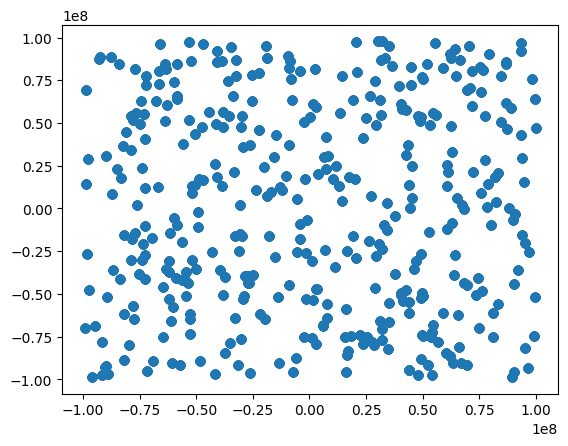

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(houses[:, 0], houses[:, 1])

In [ ]:
import pandas as pd

df = pd.DataFrame(houses, columns=['x','y'])
df.head()

,x,y
0,-10452622,18779177
1,-66633062,80466642
2,30245517,97800613
3,-32888777,-63963290
4,17630614,18535706


In [ ]:
from sklearn.cluster import KMeans

# Создаем модель кластеризации
kmeans = KMeans(n_clusters=k)

# обучим нашу модель
kmeans.fit(df)

# выведем полученные метки кластеров, которые вычислил алгоритм
# Setosa - 0, Versicolour – 1 и Virginica – 2
Y_pred = kmeans.labels_
Y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([149,  27, 230, ..., 353, 277, 146], dtype=int32)

In [ ]:
df['cluster'] = Y_pred
df

,x,y,cluster
0,-10452622,18779177,149
1,-66633062,80466642,27
2,30245517,97800613,230
3,-32888777,-63963290,135
4,17630614,18535706,7
...,...,...,...
17033,94060900,-15398571,141
17034,78295322,760737,274
17035,-32697415,-15896315,353
17036,49750691,-74011013,277


In [ ]:
def profit_function(centers, clusters, c_cost, C, k):
    """
    Расчитывает отрицательную прибыль для заданных центров выдачи заказов.
    """
    total_profit = C
    center_coords = centers.reshape(k, 2)  # Преобразование массива центров в массив координат
    for i in range(k):
        center = center_coords[i]
        cluster_houses = clusters[i]
        for h in cluster_houses:
            d = np.sqrt((h[0] - center[0])**2 + (h[1] - center[1])**2)
            if d == 0:
                d = 1e-6
            total_profit -= c_cost * (np.sqrt(d**4) + 1) / len(cluster_houses)
    return -total_profit

def optimize_locations(clusters, k, c_cost, C):
    """
    Использует метод оптимизации для нахождения лучших местоположений ПВЗ для всех кварталов.
    """
    initial_centers = np.array([np.mean(cluster, axis=0) for cluster in clusters.values()])  # Инициализация: средние точки кварталов
    initial_centers = initial_centers.flatten()  # Преобразование в одномерный массив
    result = minimize(profit_function, initial_centers, args=(clusters, c_cost, C, k),
                      method='L-BFGS-B', options={'disp': True})
    return result.x.reshape(k, 2)  # Преобразование обратно в массив координат

In [ ]:
%%time
c_cost = 10
C = 25000

# Оптимизация
optimal_centers = optimize_locations(clusters, k, c_cost, C)

# Расчёт прибыли
profit = calculate_profit(optimal_centers, clusters, c_cost, C, k)
print("Максимально достижимая прибыль:", profit)

20434282.736842107


97558604.5263158

In [ ]:
def calculate_profit(centers, clusters, c_cost, C, k):
    """
    Рассчитывает прибыль на основе найденных центров.
    """
    total_profit = C
    center_coords = centers.reshape(k, 2)  # Преобразование массива центров в массив координат
    for i in range(k):
        center = center_coords[i]
        cluster_houses = clusters[i]
        for h in cluster_houses:
            d = np.sqrt((h[0] - center[0])**2 + (h[1] - center[1])**2)
            if d == 0:
                d = 1e-6
            total_profit -= c_cost * (np.sqrt(d**4) + 1) / len(cluster_houses)
    return total_profit

# Расчёт прибыли
profit = calculate_profit(optimal_centers, clusters, c_cost, C, k)
print("Максимально достижимая прибыль:", profit)

Максимально достижимая прибыль: -26700265.530218646


# 557. Дерево с подвохом ❌ - просто не поняла и не решила

Программист Петя построил отличное дерево решений для задачи, которую ему дали на работе. К сожалению, Петя очень устал в пятницу и, уйдя с работы, забыл дерево на рабочем столе. Его коллега Ваня, известный шутник, на следующий день сказал, что кто-то подменил его дерево за ночь.

Однако Петя помнит соответствие листов классам в датасете. Он собирается проверить дерево, подавая ему на вход некоторое количество примеров и фиксируя класс листа, в который можно попасть для каждого из примеров. Для этого каждый лист ему необходимо посетить хотя бы один раз. Помогите Пете собрать такой датасет, содержащий $f$ признаков, чтобы проверить дерево, лежащее на столе.

**Формат ввода**

В первой строке задаются числа $f,c,n$, где $1≤f≤100$ − количество признаков в одной строке датасета, $2≤c≤10$ − количество классов в датасете (и, соответственно, в решающем дереве), $1≤n≤1000$ − количество вершин в решающем дереве.

Далее идёт $2×n$ строк с описанием дерева. Нечетные строки имеют вид $p,q$. Значение $p$ соответствует номеру вершины, являющейся левым потомком текущей вершины, а $q$ − номеру вершины, являющейся правым потомком текущей вершины. Если потомок (левый или правый) является непустым, то величины $p$ или $q$ будут принимать значения от $1$ до $n$. В этом случае на следующей (четной) строке задаются значения $t,s$, где величина $−10^3<t<10^3$ является порогом для признака с номером $s, 1≤s≤f$. В противном случае значения $p$ и $q$ будут равны − $1$, в этом случае задаваемая вершина − лист. Тогда вместо чисел $t$ и $s$ для нее задается значение класса $k,1≤k≤c$.

**Формат вывода**

В первой строке выходного файла должно быть число строк $m$, достаточное для проверки Петей своего дерева.

Далее должны следовать $m$ строк, в каждой строке должно присутствовать $f$ чисел $v_{m,f}$ с плавающей точкой, разделенных пробелами, при этом $−10^3≤v_{m,f}≤10^3$.

В результате проверки дерева сгенерированным вами набором данных каждый лист дерева должен быть посещён хотя бы один раз.

In [ ]:
# Чтение первой строки с числами f, c, n
# 1 <= f <= 100  − количество признаков в одной строке датасета
# 2 <= c <= 10 - количество классов в датасете (и, соответственно, в решающем дереве)
# 1 <= n <= 1000  − количество вершин в решающем дереве
f, c, n = list(map(int, input().split()))

# Чтение следующих строк для построения дерева
tree = []
for _ in range(n):
    # p - номер вершины, являющейся левым потомком текущей вершины
    # q − номер вершины, являющейся правым потомком текущей вершины
    p, q = map(int, input().strip().split())
    if p != -1 and q != -1:
        # t - порог для признака с номером s
        t, s = map(float, input().strip().split())
        tree.append((p, q, t, int(s)))
    else:
        k = int(input().strip())
        tree.append((p, q, k))



2 3 5
2 3
1 -327.0
-1 -1
1
4 5
2 -155.0
-1 -1
3
-1 -1
2


In [ ]:
def parse_tree(n, data):
    tree = {}
    thresholds = {}
    classes = {}

    index = 0
    for i in range(n):
        left, right = int(data[index]), int(data[index + 1])
        if left == -1 and right == -1:
            cls = int(data[index + 2])
            classes[i + 1] = cls
            thresholds[i + 1] = None
        else:
            threshold, feature = float(data[index + 2]), int(data[index + 3])
            thresholds[i + 1] = (threshold, feature)
        tree[i + 1] = (left, right)
        index += 4

    return tree, thresholds, classes

# n- количество вершин в решающем дереве
# f - количество признаков
# c - количество классов
f, c, n = map(int, input().split())

tree_data = []
for _ in range(2 * n):
    tree_data.append(input().split())
# 2 3 5
# 2 3
# 1 -327.0
# -1 -1
# 1
# 4 5
# 2 -155.0
# -1 -1
# 3
# -1 -1
# 2

2 3 5
2 3
1 -327.0
-1 -1
1
4 5
2 -155.0
-1 -1
3
-1 -1
2


In [ ]:
f, c, n

(2, 3, 5)

In [ ]:
tree = {}
thresholds = {}
classes = {}

index = 0
for i in range(n):
    left, right = list(map(int, tree_data[index])) # сохраняем индексы вершин ['2', '3']
    # print(left, right)
    if left == -1 and right == -1:
        cls = list(map(int, tree_data[index+1])) # ['1'] -> cls = 1
        classes[i + 1] = cls
        thresholds[i+1] = None
    else:
        # ['1', '-327.0']
        # print(tree_data[index + 1])
        feature, threshold = tree_data[index + 1]
        feature = int(feature) # 1
        threshold = float(threshold) # -327.0
        thresholds[i+1] = (feature, threshold)
    tree[i+1] = (left, right)
    index += 2

In [ ]:
tree

{1: (2, 3), 2: (-1, -1), 3: (4, 5), 4: (-1, -1), 5: (-1, -1)}

In [ ]:
thresholds

{1: (1, -327.0), 2: None, 3: (2, -155.0), 4: None, 5: None}

In [ ]:
classes

{2: [1], 4: [3], 5: [2]}

In [ ]:
def find_leaf_paths(tree, root):
    """
    Выполняет обход дерева для нахождения всех путей от корня до листов.
    """
    paths = []

    def dfs(node, path):
        if node not in tree:
            return

        left_child, right_child = tree[node]
        if left_child == -1 and right_child == -1:
            # Достигли листа, сохраняем путь
            paths.append(path)
            return

        if left_child != -1:
            dfs(left_child, path + [left_child])
        if right_child != -1:
            dfs(right_child, path + [right_child])

    dfs(root, [root])
    return paths

In [ ]:
paths = find_leaf_paths(tree, 1)
paths

[[1, 2], [1, 3, 4], [1, 3, 5]]

In [ ]:
test_cases = []

# f - количество признаков в одной строке датасета (тут их 2)
for path in paths:
    example = [0.0] * f  # Инициализируем пример с нулевыми значениями
example

[0.0, 0.0]

In [ ]:
thresholds

{1: (1, -327.0), 2: None, 3: (2, -155.0), 4: None, 5: None}

In [ ]:
test_cases = []
for path in paths:
    example = [0.0] * f
    print(f'Path: {path}')
    print(f'Initial examples: {example}')
    # тут проходим по узлам в пути
    for i in range(len(path)-1):
        node = path[i]
        next_node = path[i + 1]
        print(f'i: {i}, node: {node}, next_node: {next_node}')

        # Проверяем порог текущего узла
        if node in thresholds and thresholds[node] is not None:
            feature, threshold = thresholds[node]
            print(f'Threshold for current node {node}: {thresholds[node]}')
            print(f'Current feature: {feature}')
            # Устанавливаем значение признака на основе порога
            if next_node == tree[node][0]:  # Если следующий узел - левый потомок
                print(f'Левый потомок: {tree[node][0]}')
                example[feature - 1] = threshold - 1.0  # Значение ниже порога
            elif next_node == tree[node][1]:  # Если следующий узел - правый потомок
                print(f'Правый потомок: {tree[node][1]}')
                example[feature - 1] = threshold + 1.0  # Значение выше порога

    print(f'Example for this path: {example}')
    print('________________')
    test_cases.append(example)

test_cases

Path: [1, 2]
Initial examples: [0.0, 0.0]
i: 0, node: 1, next_node: 2
Threshold for current node 1: (1, -327.0)
Current feature: 1
Левый потомок: 2
Example for this path: [-328.0, 0.0]
________________
Path: [1, 3, 4]
Initial examples: [0.0, 0.0]
i: 0, node: 1, next_node: 3
Threshold for current node 1: (1, -327.0)
Current feature: 1
Правый потомок: 3
i: 1, node: 3, next_node: 4
Threshold for current node 3: (2, -155.0)
Current feature: 2
Левый потомок: 4
Example for this path: [-326.0, -156.0]
________________
Path: [1, 3, 5]
Initial examples: [0.0, 0.0]
i: 0, node: 1, next_node: 3
Threshold for current node 1: (1, -327.0)
Current feature: 1
Правый потомок: 3
i: 1, node: 3, next_node: 5
Threshold for current node 3: (2, -155.0)
Current feature: 2
Правый потомок: 5
Example for this path: [-326.0, -154.0]
________________


[[-328.0, 0.0], [-326.0, -156.0], [-326.0, -154.0]]

In [ ]:
def find_leaf_paths(tree, root):
    """
    Выполняет обход дерева для нахождения всех путей от корня до листов.
    """
    paths = []

    def dfs(node, path):
        if node not in tree:
            return

        left_child, right_child = tree[node]
        if left_child == -1 and right_child == -1:
            # Достигли листа, сохраняем путь
            paths.append(path)
            return

        if left_child != -1:
            dfs(left_child, path + [left_child])
        if right_child != -1:
            dfs(right_child, path + [right_child])

    dfs(root, [root])
    return paths

def generate_test_cases(paths, thresholds, f):
    """
    Генерирует тестовые примеры для достижения всех листов.
    """
    test_cases = []

    for path in paths:
        example = [0.0] * f  # Инициализируем пример с нулевыми значениями

        for i in range(len(path) - 1):
            node = path[i]
            next_node = path[i + 1]

            # Проверяем порог текущего узла
            if node in thresholds and thresholds[node] is not None:
                feature, threshold = thresholds[node]
                # Устанавливаем значение признака на основе порога
                if next_node == tree[node][0]:  # Если следующий узел - левый потомок
                    example[feature - 1] = threshold - 1.0  # Значение ниже порога
                elif next_node == tree[node][1]:  # Если следующий узел - правый потомок
                    example[feature - 1] = threshold + 1.0  # Значение выше порога

        # Добавляем пример в список
        test_cases.append(example)

    return test_cases

# считываем данные
# n- количество вершин в решающем дереве
# f - количество признаков
# c - количество классов
f, c, n = map(int, input().split())

tree_data = []
for _ in range(2 * n):
    tree_data.append(input().split())

# создаем дерево
tree = {}
thresholds = {}
classes = {}

index = 0
for i in range(n):
    left, right = list(map(int, tree_data[index])) # сохраняем индексы вершин ['2', '3']
    # print(left, right)
    if left == -1 and right == -1:
        cls = list(map(int, tree_data[index+1])) # ['1'] -> cls = 1
        classes[i + 1] = cls
        thresholds[i+1] = None
    else:
        # ['1', '-327.0']
        # print(tree_data[index + 1])
        feature, threshold = tree_data[index + 1]
        feature = int(feature) # 1
        threshold = float(threshold) # -327.0
        thresholds[i+1] = (feature, threshold)
    tree[i+1] = (left, right)
    index += 2

paths = find_leaf_paths(tree, 1)
test_cases = generate_test_cases(paths, thresholds, f)
print(len(test_cases))  # Количество тестовых примеров
for case in test_cases:
    print(" ".join(f"{value:.1f}" for value in case))  # Выводим пример в требуемом формате

# 2 3 5
# 2 3
# 1 -327.0
# -1 -1
# 1
# 4 5
# 2 -155.0
# -1 -1
# 3
# -1 -1
# 2

2 3 5
2 3
1 -327.0
-1 -1
1
4 5
2 -155.0
-1 -1
3
-1 -1
2
3
-328.0 0.0
-326.0 -156.0
-326.0 -154.0


# 559. Медаль за сжатие ❌ - ошибка исполнения

Даны $n$ объектов, у которых есть $m$ признаков. Количество признаков достаточно большое, что приводит к проблемам в обучении моделей. Возможно, какие-то из этих признаков являются бесполезными - соответственно, их можно отбросить или преобразовать в другие признаки. Необходимо уменьшить количество используемых признаков не менее чем на $\frac{1}{3}$, потеряв при этом не более $p$ точности ($accuracy$).

**Формат ввода**

В первой строке входных данных заданы три числа $n,1≤n≤10^5$, $m,3≤m≤10^3$ и $p,0.1≤p≤0.9$, где
- $n$ - количество объектов,
- $m$ - количество признаков у каждого объекта
- $p$ - допустимая потеря точности.

На $n$ следующих строках задается таблица с объектами, содержащая $m+1$ столбец. В $m$ первых столбцах перечисляются признаки объектов, являющиеся числами с плавающей точкой, а в
$m+1$ столбце задается метка класса в виде целого числа для каждого из объектов.

Ссылка на файл с тестовыми входными данными: https://disk.yandex.ru/d/XOQvEmlgf2VbsQ

**Формат вывода**

В качестве ответа на задачу необходимо отправить код.

На первой строке ваша программа должна вывести $v$ - количество признаков после сжатия объектов. На следующих $n$ строках должны быть перечислены сжатые признаки объектов, поданных на вход вашей программе. Количество признаков $v$ в результате должно удовлетворять неравенству $v≤ \frac{2}{3}m$.

Для оценки точности будет использоваться усредненная точность линейной регрессии, обученной на кросс-валидации на закрытой выборке. В результате точность не должна упасть больше чем на $p$ в сравнении с точностью модели, полученной с такими же параметрами обучения на неизменённых признаках на кросс-валидации.

In [ ]:
import numpy as np

def generate_data(n, m, p, file_name):
    # Генерация случайных данных
    np.random.seed(42)  # Для воспроизводимости результатов

    # Генерация случайных признаков (массив n x m)
    features = np.random.uniform(-1000, 1000, (n, m))

    # Генерация случайных меток классов (0 или 1)
    llabels = np.random.randint(0, 2, size=(n))

    # Запись данных в файл
    with open(file_name, 'w') as f:
        f.write(f"{n} {m} {p}\n")  # Первая строка: n, m, p
        for i in range(features.shape[0]):
            f.write(" ".join(map(str, features[i])) + ' ' + str(labels[i]) + "\n")  # Остальные строки: признаки и метки

# Параметры для генерации данных
n = 1000  # Количество объектов
m = 3    # Количество признаков
p = 0.2   # Допустимая потеря точности

# Генерация и сохранение данных в файл
generate_data(n, m, p, 'generated_data.txt')

print("Данные успешно сгенерированы и сохранены в 'generated_data.txt'")

Данные успешно сгенерированы и сохранены в 'generated_data.txt'


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def read_data():
    with open('/content/generated_data.txt', 'r') as file:
        # Читаем первую строку
        first_line = file.readline().strip()
        n, m, p = list(map(float, first_line.split()))
        n = int(n)
        m = int(m)
        p = float(p)

        # Инициализируем списки для данных
        features = []
        labels = []

        # Читаем оставшиеся строки
        for line in file:
            parts = line.strip().split()
            # Разделяем признаки и метку класса
            feature_values = list(map(float, parts[:-1]))
            label = int(parts[-1])

            features.append(feature_values)
            labels.append(label)

    return n, m, p, features, labels

n, m, p, features, labels = read_data()

print("Количество объектов:", n)
print("Количество признаков:", m)
print("Допустимая потеря точности:", p)
print("Признаки объектов:", features)
print("Метоки классов:", labels)

Количество объектов: 1000
Количество признаков: 3
Допустимая потеря точности: 0.2
Признаки объектов: [[-250.91976230527507, 901.4286128198323, 463.98788362281016], [197.31696839407323, -687.9627191151269, -688.0109593275947], [-883.8327756636011, 732.3522915498704, 202.23002348641762], [416.145155592091, -958.831011408395, 939.8197043239886], [664.8852816008434, -575.3217786434477, -636.3500655857988], [-633.1909802931324, -391.5155140809245, 49.512863264475754], [-136.10996271576846, -417.54171960391614, 223.70578944475892], [-721.0122786959164, -415.7107029295637, -267.27631341261656], [-87.86003156592813, 570.3519227860272, -600.6524356832806], [28.468876827223312, 184.82913772408483, -907.0991745600046], [215.08970380287678, -658.9517526254169, -869.896814029441], [897.7710745066665, 931.2640661491187, 616.7946962329222], [-390.7724616532586, -804.6557719872322, 368.46605302431385], [-119.69501252079738, -755.9235303104424, -9.646179777459679], [-931.2229577695632, 818.640804157564

In [ ]:
import pandas as pd

df = pd.DataFrame(features)
df['target'] = labels

df

,0,1,2,target
0,-250.919762,901.428613,463.987884,0
1,197.316968,-687.962719,-688.010959,1
2,-883.832776,732.352292,202.230023,0
3,416.145156,-958.831011,939.819704,0
4,664.885282,-575.321779,-636.350066,1
...,...,...,...,...
995,934.070551,-896.662557,9.591197,0
996,436.907895,725.280942,-641.488776,1
997,600.006964,105.414151,-206.892636,0
998,-736.569943,730.591518,-685.453584,1


In [ ]:
df['target'].value_counts()

target
0    513
1    487
Name: count, dtype: int64

In [ ]:
# Изначальная точность модели
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

initial_accuracy = accuracy_score(y_test, model.predict(X_test))

print(f'Initial_accuracy: {initial_accuracy}')

Initial_accuracy: 1.0


In [ ]:
from sklearn.model_selection import cross_val_score

model = LogisticRegression()
scores = cross_val_score(model, features, labels, cv=5, scoring='accuracy')
scores

array([1., 1., 1., 1., 1.])

In [ ]:
m

16

In [ ]:
# Отбор признаков
k = int(2/3 * m)
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(features, labels)

# Оценка точности с отобранными признаками
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, labels, test_size=0.3, random_state=42)
model.fit(X_train_new, y_train)
reduced_accuracy = accuracy_score(y_test, model.predict(X_test_new))

reduced_accuracy

1.0

In [ ]:
def feature_selection_and_evaluation():
    n, m, p, features, labels = read_data()

    # Изначальная точность модели
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    initial_accuracy = accuracy_score(y_test, model.predict(X_test))

    # Отбор признаков
    k = int(2/3 * m)
    selector = SelectKBest(score_func=f_classif, k=k)
    X_new = selector.fit_transform(features, labels)

    # Оценка точности с отобранными признаками
    X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, labels, test_size=0.3, random_state=42)
    model.fit(X_train_new, y_train)
    reduced_accuracy = accuracy_score(y_test, model.predict(X_test_new))

    print(X_new.shape[1])
    for row in X_new:
        print(' '.join(map(str, row)))

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def read_data():
    with open('/content/generated_data.txt', 'r') as file:
        # Читаем первую строку
        first_line = file.readline().strip()
        n, m, p = map(float, first_line.split())
        n = int(n)
        m = int(m)
        p = float(p)

        # Инициализируем списки для данных
        features = []
        labels = []

        # Читаем оставшиеся строки
        for line in file:
            parts = line.strip().split()
            # Разделяем признаки и метку класса
            feature_values = list(map(float, parts[:-1]))
            label = int(parts[-1])

            features.append(feature_values)
            labels.append(label)

    return n, m, p, features, labels

def feature_selection_and_evaluation():
    n, m, p, features, labels = read_data()

    # Изначальная точность модели
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    initial_accuracy = accuracy_score(y_test, model.predict(X_test))

    # Отбор признаков
    k = int(2/3 * m)
    selector = SelectKBest(score_func=f_classif, k=k)
    X_new = selector.fit_transform(features, labels)

    # Оценка точности с отобранными признаками
    X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, labels, test_size=0.3, random_state=42)
    model.fit(X_train_new, y_train)
    reduced_accuracy = accuracy_score(y_test, model.predict(X_test_new))

    print(X_new.shape[1])
    for row in X_new:
        print(' '.join(map(str, row)))

feature_selection_and_evaluation()

2
901.4286128198323 463.98788362281016
-687.9627191151269 -688.0109593275947
732.3522915498704 202.23002348641762
-958.831011408395 939.8197043239886
-575.3217786434477 -636.3500655857988
-391.5155140809245 49.512863264475754
-417.54171960391614 223.70578944475892
-415.7107029295637 -267.27631341261656
570.3519227860272 -600.6524356832806
184.82913772408483 -907.0991745600046
-658.9517526254169 -869.896814029441
931.2640661491187 616.7946962329222
-804.6557719872322 368.46605302431385
-755.9235303104424 -9.646179777459679
818.6408041575642 -482.44003679996615
-376.5778478211781 40.13604235562161
-630.2910889489459 939.1692555291172
878.9978831283781 789.6547008552977
843.7484700462337 -823.014995896161
-909.5454221789239 -349.33933847347134
-457.3019364522082 657.4750183038586
-438.1309806252385 85.39216631649697
604.3939615080794 -850.8987126404584
544.4895385933148 -602.5686369316552
630.9228569096683 413.71468769523426
542.5406933718914 -851.9106965318192
-768.2618809497405 726.2068

# 570. Лента рекомендаций

В вашей ленте рекомендаций вам постоянно попадаются видео с котиками. Сначала вы очень радовались и рассылали милые видео по всем своим друзьям, но спустя время вам захотелось разнообразить вашу ленту, ведь друзья уже перестали отвечать на эти милые видео. Это не беда! Ведь вы знаете, что с помощью методов машинного обучения, вы можете подобрать самые подходящие видео и разнообразить свою ленту.

Всего в списке рекомендаций находится $p$ видео, из них нужно выбрать $n$ наиболее интересных вам, при этом, вы хотите, чтобы количество видео на каждую тему не превосходило $k$.

**Формат ввода**

В первой строке записаны три числа: $p (1≤p≤100 000)$ − количество рекомендованных видео, $n (1≤n≤p)$ − количество видео, которые нужно отобрать и $k (1≤k≤p)$ − ограничение на количество видео на одну тему.

В следующих $p$ строках записаны темы видео в том порядке, как они рекомендованы. Название темы состоит из английских букв и пробелов. Длина каждой темы не превышает $30$ символов.

В следующей строке перечислены $p$ целых чисел − $id$ видео в том же порядке, в котором перечислены их темы.

**Формат вывода**

Выведите темы и $id$ тех видео, которые рекомендованы вам в вашей ленте. Сначала выведите тему видео, затем пробел, знак # и $id$ видео.

In [ ]:
p, n, k = list(map(int, input().split()))

topics = []
for i in range(p):
    topics.append(input())

ids = list(map(int, input().split()))

# 9 5 2
# Cats
# Dogs
# Cats
# Cats
# Stas Mikhailov
# Anime
# Stas Mikhailov
# Dogs
# Anime
# 1 1 2 3 2 1 1 2 2

9 5 2
Cats
Dogs
Cats
Cats
Stas Mikhailov
Anime
Stas Mikhailov
Dogs
Anime
1 1 2 3 2 1 1 2 2


In [ ]:
list(zip(topics, ids))

[('Cats', 1),
 ('Dogs', 1),
 ('Cats', 2),
 ('Cats', 3),
 ('Stas Mikhailov', 2),
 ('Anime', 1),
 ('Stas Mikhailov', 1),
 ('Dogs', 2),
 ('Anime', 2)]

In [ ]:
# Создаем словарь для хранения видео по темам
topic_dict = {}

# Заполняем словарь
for i in range(p):
    topic = topics[i]
    video_id = ids[i]
    if topic not in topic_dict:
        topic_dict[topic] = []
    topic_dict[topic].append(video_id)

In [ ]:
topic_dict

{'Cats': [1, 2, 3], 'Dogs': [1, 2], 'Stas Mikhailov': [2, 1], 'Anime': [1, 2]}

In [ ]:
# Собираем результат
selected_videos = []
for topic in topics:
    if len(selected_videos) >= n:
        break
    if topic in topic_dict and topic_dict[topic]:
        while topic_dict[topic] and len(selected_videos) < n:
            video_id = topic_dict[topic].pop(0)
            selected_videos.append((topic, video_id))

for topic, video_id in selected_videos:
    print(f"{topic} #{video_id}")

Cats #1
Cats #2
Cats #3
Dogs #1
Dogs #2


In [ ]:
from collections import defaultdict

def select_videos(p, n, k, topics, ids):
    topic_count = defaultdict(int)
    visited_topics = set()
    selected_videos = []

    for i in range(p):
        topic = topics[i]
        video_id = ids[i]

        if topic in visited_topics:
            continue

        topic_count[topic] += 1

        selected_videos.append(f"{topic} #{video_id}")

        if topic_count[topic] >= k:
            visited_topics.add(topic)

        if len(selected_videos) == n:
            break

    return selected_videos

# p, n, k = 9, 5, 2
# topics = ['Cats', 'Dogs', 'Cats', 'Cats', 'Stas Mikhailov', 'Anime', 'Stas Mikhailov', 'Dogs', 'Anime']
# ids = [1, 1, 2, 3, 2, 1, 1, 2, 2]

p, n, k = list(map(int, input().split()))

topics = []
for i in range(p):
    topics.append(input())

ids = list(map(int, input().split()))

selected_videos = select_videos(p, n, k, topics, ids)
print("\n".join(selected_videos))

Cats #1
Dogs #1
Cats #2
Stas Mikhailov #2
Anime #1


# 585. Пересечение кругов

Вам даны три круга, требуется найти площадь их пересечения.

**Формат ввода**

Скачайте файл с данными (50 наборов).

Один набор задается одной строкой, содержащей 9 целых чисел: $x_1 y_1 r_1 x_2 y_2 r_2 x_3 y_3 r_3$.

**Формат вывода**

Введите $50$ действительных чисел (десятичный разделитель – точка): площадь пересечения кругов для каждого из наборов данных. Числа введите по одному в строке.

Ваш ответ будет принят, если относительная или абсолютная погрешность введенных чисел от правильных ответов не более $10^{−4}$.

In [ ]:
import pandas as pd

data = []

with open('/content/data.txt', 'r') as file:
    for line in file:
        # Удаление лишних пробелов и перевод строки
        line = line.strip()
        # Разделение строки на части и преобразование в целые числа
        numbers = list(map(int, line.split()))
        # Добавление списка чисел в общий список данных
        data.append(numbers)

cols = ['x1', 'y1', 'r1', 'x2', 'y2', 'r2', 'x3', 'y3', 'r3']
df = pd.DataFrame(data, columns=cols)
df.head()



,x1,y1,r1,x2,y2,r2,x3,y3,r3
0,2,2,6,1,1,6,9,2,4
1,-5,7,6,7,6,9,4,-1,7
2,1,-3,6,6,1,8,10,6,9
3,-4,-9,9,0,0,7,1,5,10
4,5,-9,4,7,-4,2,3,-2,10


**Все возможные случаи пересечния трёх кругов:**

Хорошая статья с объяснением: http://ambrnet.com/TrigoCalc/Circles3/Intersection.htm

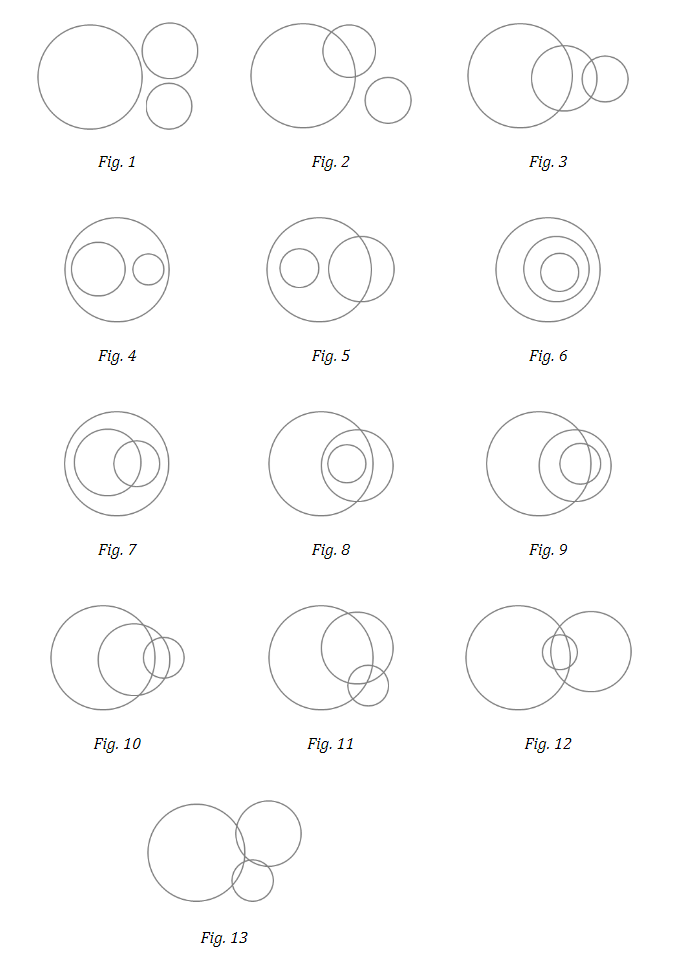

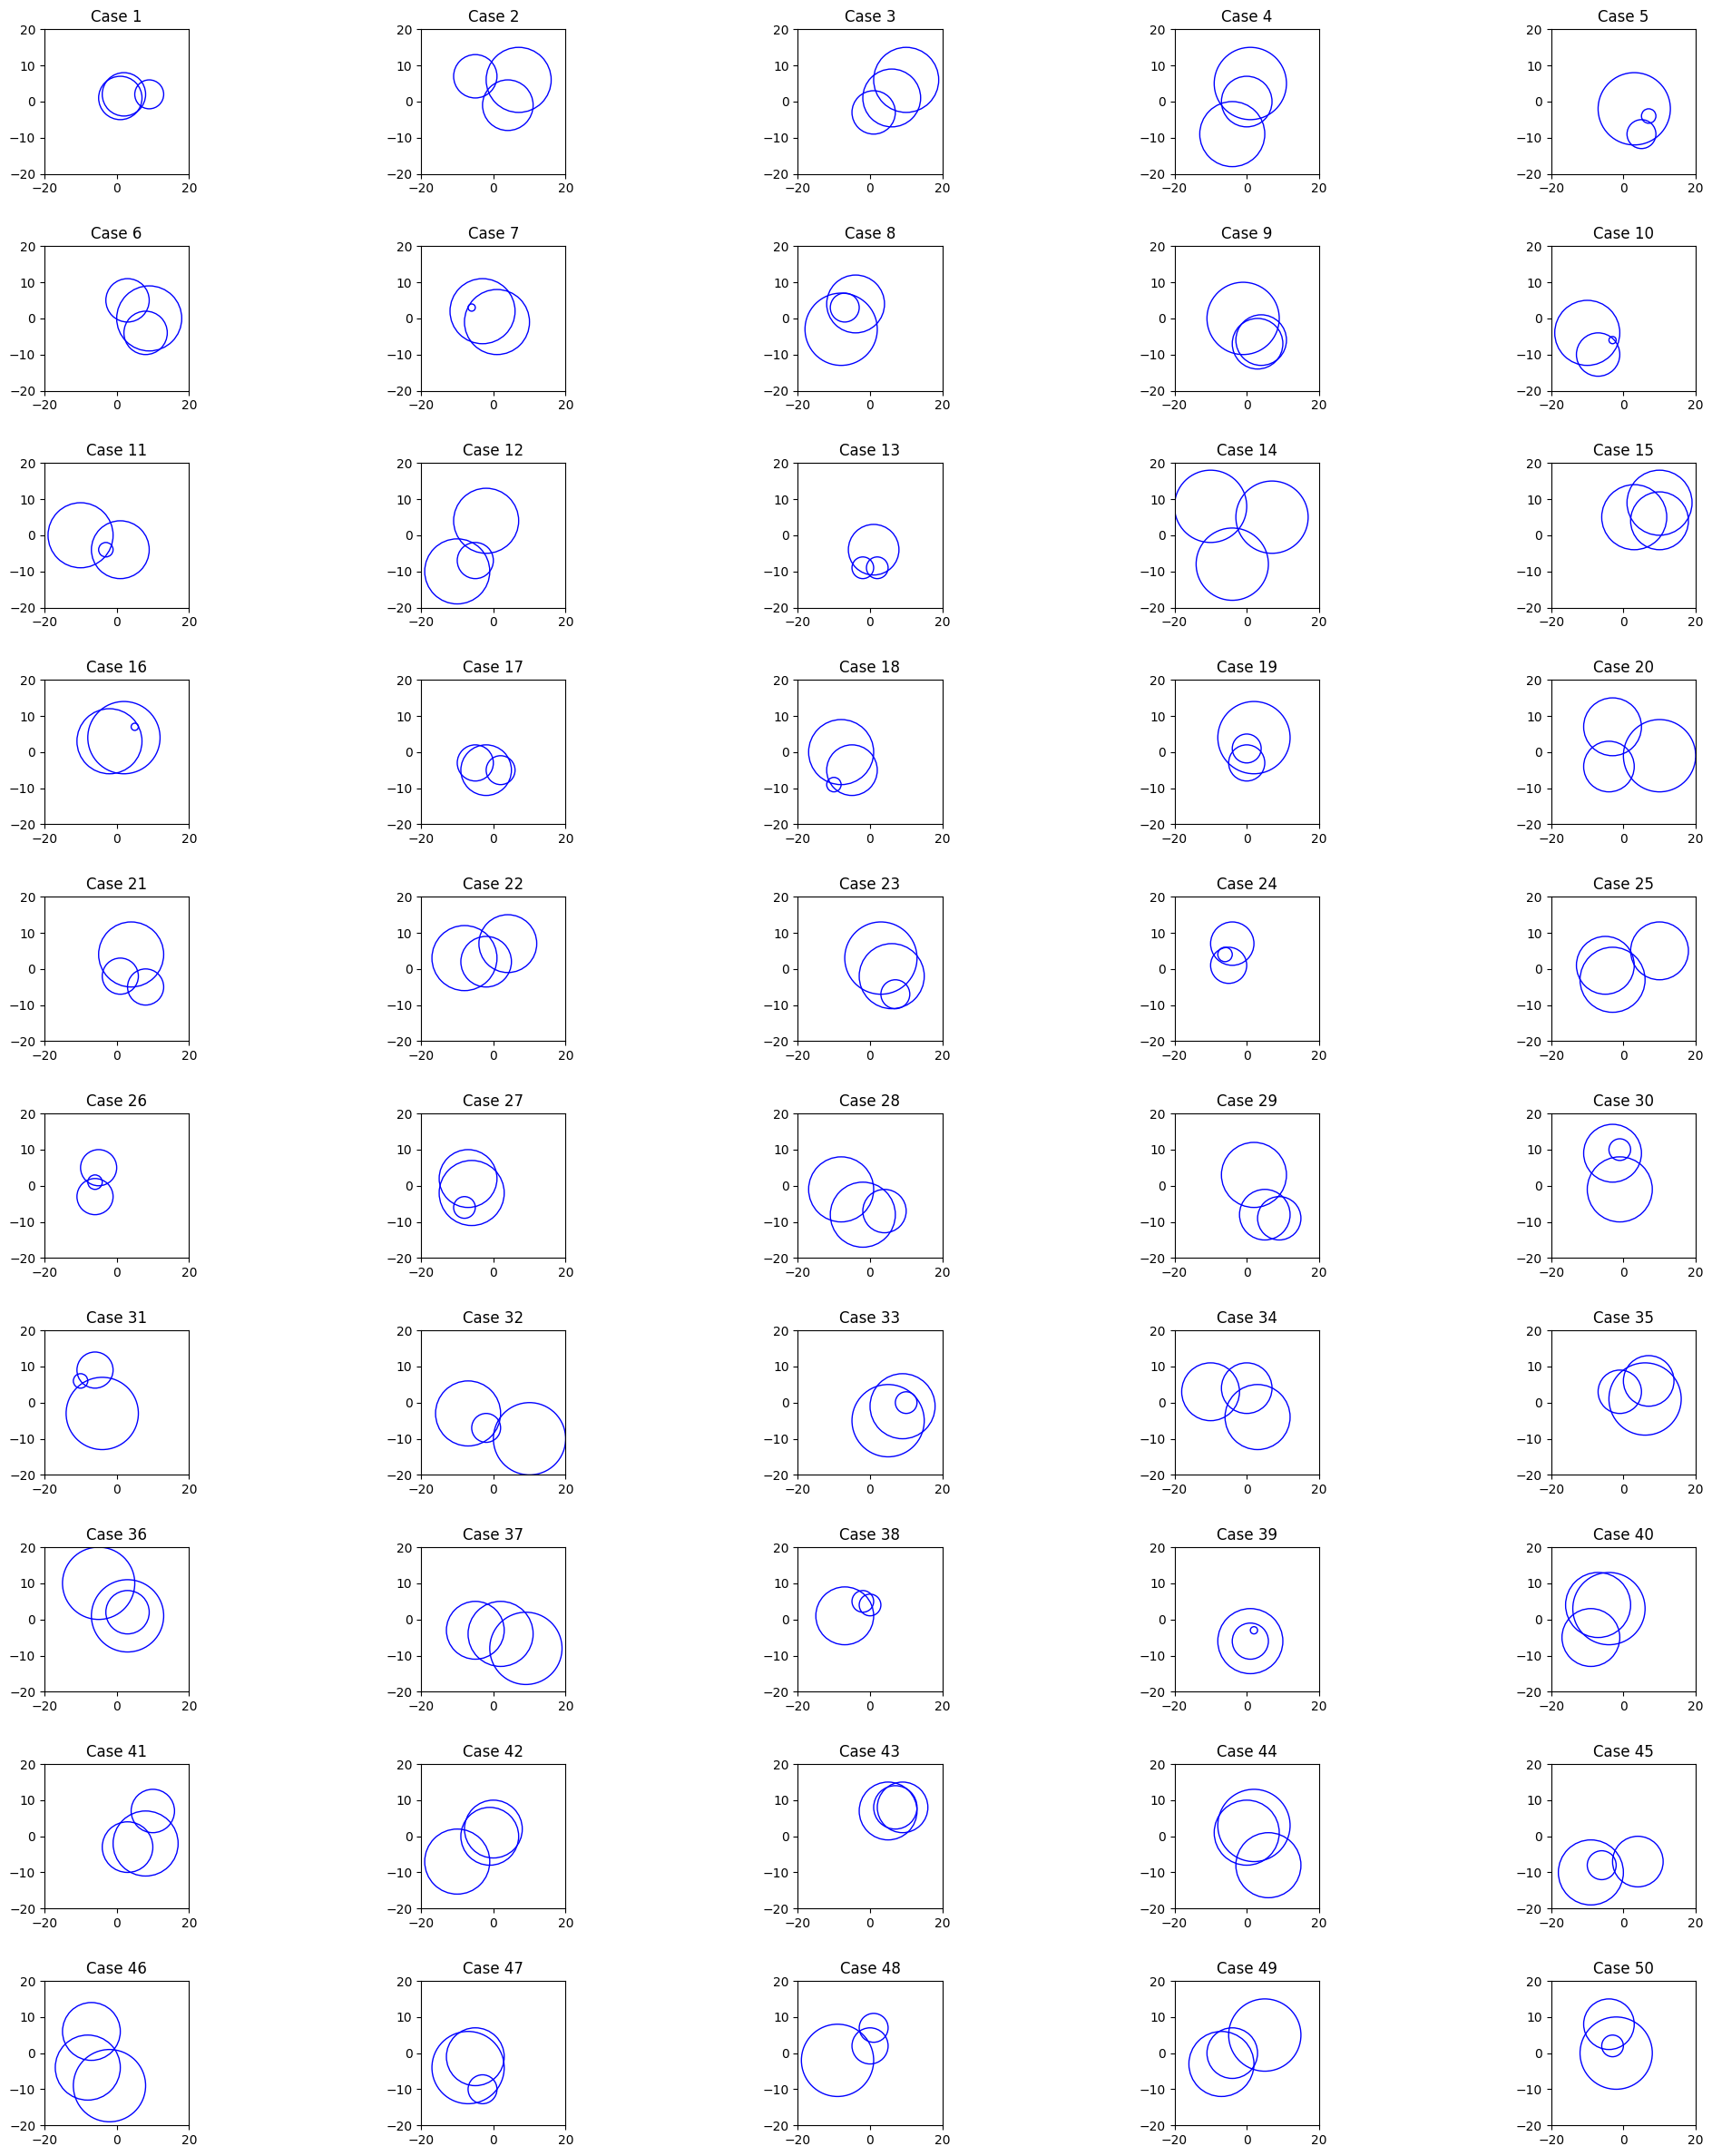

In [ ]:
# Посмотрим на все 50 случаев, которые нам даны ради интереса
# их всего 50 и визуализировать не так уж сложно и долго
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_circles(ax, row):
    # Извлечение данных из строки DataFrame
    x1, y1, r1 = row[0], row[1], row[2]
    x2, y2, r2 = row[3], row[4], row[5]
    x3, y3, r3 = row[6], row[7], row[8]

    # Создание и добавление кругов на ось
    circles = [
        (x1, y1, r1),
        (x2, y2, r2),
        (x3, y3, r3)
    ]
    for x, y, r in circles:
        circle = plt.Circle((x, y), r, color='blue', fill=False)
        ax.add_artist(circle)

    # Устанавливаем границы осей
    ax.set_xlim(-20, 20)
    ax.set_ylim(-20, 20)
    ax.set_aspect('equal', 'box')

def plot_all_cases(df):
    num_cases = len(df)
    num_rows = 10
    num_cols = 5
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(25, 30))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    for i in range(num_cases):
        row = i // num_cols
        col = i % num_cols
        ax = axs[row, col]
        plot_circles(ax, df.iloc[i])
        ax.set_title(f'Case {i+1}')

    plt.show()

# Визуализация данных
plot_all_cases(df)

Исходя из увиденного, у нас вообще нет случаев 1, 2

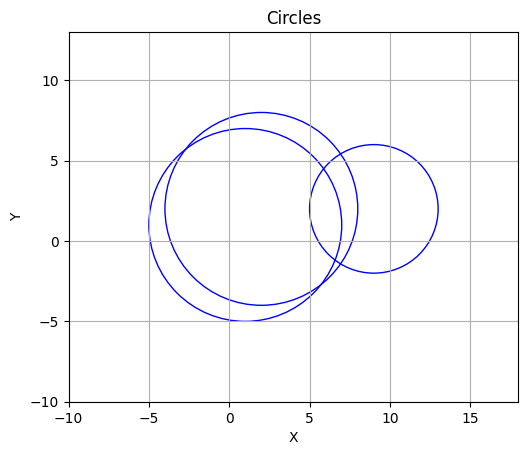

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_circle(ax, center, radius, color):
    circle = plt.Circle(center, radius, color=color, fill=False)
    ax.add_artist(circle)

def plot_circles(centers, radii):
    fig, ax = plt.subplots()
    ax.set_aspect('equal')

    # Устанавливаем границы осей
    min_x = min(center[0] - radius for center, radius in zip(centers, radii))
    max_x = max(center[0] + radius for center, radius in zip(centers, radii))
    min_y = min(center[1] - radius for center, radius in zip(centers, radii))
    max_y = max(center[1] + radius for center, radius in zip(centers, radii))
    ax.set_xlim(min_x - 5, max_x + 5)
    ax.set_ylim(min_y - 5, max_y + 5)

    for center, radius in zip(centers, radii):
        plot_circle(ax, center, radius, 'blue')

    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Circles')
    plt.grid(True)
    plt.show()

# Пример использования
k = 0
centers = [(df.loc[k, 'x1'], df.loc[k, 'y1']), (df.loc[k, 'x2'], df.loc[k, 'y2']), (df.loc[k, 'x3'], df.loc[k, 'y3'])]
radii = [df.loc[k, 'r1'], df.loc[k, 'r2'], df.loc[k, 'r3']]
plot_circles(centers, radii)

In [ ]:
centers

[(2, 2), (1, 1), (9, 2)]

In [ ]:
radii

[6, 6, 4]

In [ ]:
k = 0
x1, y1, r1, x2, y2, r2, x3, y3, r3 = df.loc[k]
x1, y1, r1, x2, y2, r2, x3, y3, r3

(2, 2, 6, 1, 1, 6, 9, 2, 4)

In [ ]:
print(intersection_area_1(x1, y1, r1, x2, y2, r2, x3, y3, r3))
print(intersection_area_2(x1, y1, r1, x2, y2, r2, x3, y3, r3)) # shapely
print(intersection_area_3(x1, y1, r1, x2, y2, r2, x3, y3, r3))
# 7.599910

7.52
7.579573
7.519999999999884


In [ ]:
# Пример использования функции
circles = [(x1, y1, r1), (x2, y2, r2), (x3, y3, r3)]
area = monte_carlo_intersection_area(circles)
print(f"Estimated area of intersection of three circles: {area}")

Estimated area of intersection of three circles: 7.575867


In [ ]:
# 4 вариант
# Определяем начальные границы (например, от минимальной до максимальной координаты с учетом радиусов)
x_min = min(x1 - r1, x2 - r2, x3 - r3)
x_max = max(x1 + r1, x2 + r2, x3 + r3)
y_min = min(y1 - r1, y2 - r2, y3 - r3)
y_max = max(y1 + r1, y2 + r2, y3 + r3)

circles = [(x1, y1, r1), (x2, y2, r2), (x3, y3, r3)]
quadtree = Quadtree(x_min, x_max, y_min, y_max, threshold=0.01)

area = quadtree.calculate_intersection_area(circles)
print(f"Estimated area of intersection of three circles: {round(area, 6)}")

Estimated area of intersection of three circles: 0.0


In [ ]:
import numpy as np
from scipy.integrate import dblquad

# Функция, определяющая, находится ли точка (x, y) внутри всех трех окружностей
def inside_all_circles(x, y, circles):
    for cx, cy, r in circles:
        if (x - cx) ** 2 + (y - cy) ** 2 > r ** 2:
            return 0
    return 1

for circle in data:
    # Параметры окружностей
    x1, y1, r1, x2, y2, r2, x3, y3, r3 = circle
    circles = [(x1, y1, r1), (x2, y2, r2), (x3, y3, r3)]

    # Определяем границы интегрирования (прямоугольник, охватывающий все три окружности)
    x_min = min(x1 - r1, x2 - r2, x3 - r3)
    x_max = max(x1 + r1, x2 + r2, x3 + r3)
    y_min = min(y1 - r1, y2 - r2, y3 - r3)
    y_max = max(y1 + r1, y2 + r2, y3 + r3)

    # Интегрируем функцию inside_all_circles
    area, _ = dblquad(lambda x, y: inside_all_circles(x, y, circles), x_min, x_max, lambda x: y_min, lambda x: y_max)
    print(round(area, 6))

7.557057
1.243797
11.58473
33.236753
1.005694
7.088651
2.79967
33.023024
84.520335
1.72679
9.532604
6.908222
0.0
0.0
85.603709
2.942706
5.852148
4.866418
28.3787
0.233422
8.441314
31.440852
16.902542
0.0
0.0
0.0
12.613875
4.876782
3.733998
2.697898
0.836346
0.0
3.094982
8.32155
29.587316
34.603984
21.167065
2.076177
3.12839
71.370652
1.746316
24.290414
103.255401
64.736293
1.428025
12.607892
13.428701
0.255791
38.433108
18.299407


In [ ]:
# 1 вариант решения
import numpy as np

def is_inside_circle(x, y, cx, cy, r):
    return (x - cx) ** 2 + (y - cy) ** 2 <= r ** 2

def intersection_area_1(x1, y1, r1, x2, y2, r2, x3, y3, r3):
    x_min = min(x1 - r1, x2 - r2, x3 - r3)
    x_max = max(x1 + r1, x2 + r2, x3 + r3)
    y_min = min(y1 - r1, y2 - r2, y3 - r3)
    y_max = max(y1 + r1, y2 + r2, y3 + r3)

    grid_size = 0.1
    area = 0
    x_range = np.arange(x_min, x_max, grid_size)
    y_range = np.arange(y_min, y_max, grid_size)

    for x in x_range:
        for y in y_range:
            if (is_inside_circle(x, y, x1, y1, r1) and
                is_inside_circle(x, y, x2, y2, r2) and
                is_inside_circle(x, y, x3, y3, r3)):
                area += grid_size * grid_size

    return round(area,7)

In [ ]:
# 2 вариант решения
from shapely.geometry import Polygon
from shapely.geometry import Point
from shapely.ops import unary_union
import numpy as np

def circle_to_polygon(cx, cy, r, num_points=100):
    angles = np.linspace(0, 2 * np.pi, num_points, endpoint=False)
    points = [(cx + r * np.cos(angle), cy + r * np.sin(angle)) for angle in angles]
    return points

def intersection_area_2(x1, y1, r1, x2, y2, r2, x3, y3, r3):
    # Создание кругов как многоугольников
    circle1 = Polygon(circle_to_polygon(x1, y1, r1))
    circle2 = Polygon(circle_to_polygon(x2, y2, r2))
    circle3 = Polygon(circle_to_polygon(x3, y3, r3))

    # Найти пересечения двух кругов
    intersection12 = circle1.intersection(circle2)
    intersection123 = intersection12.intersection(circle3)

    return round(intersection123.area, 6)

In [ ]:
# 3 вариант решения
def is_inside_circle(x, y, cx, cy, r):
    return (x - cx) ** 2 + (y - cy) ** 2 <= r ** 2

def intersection_area_3(x1, y1, r1, x2, y2, r2, x3, y3, r3):
    x_min = min(x1 - r1, x2 - r2, x3 - r3)
    x_max = max(x1 + r1, x2 + r2, x3 + r3)
    y_min = min(y1 - r1, y2 - r2, y3 - r3)
    y_max = max(y1 + r1, y2 + r2, y3 + r3)

    grid_size = 0.1
    area = 0
    x_range = np.arange(x_min, x_max, grid_size)
    y_range = np.arange(y_min, y_max, grid_size)

    for x in x_range:
        for y in y_range:
            if (is_inside_circle(x, y, x1, y1, r1) and
                is_inside_circle(x, y, x2, y2, r2) and
                is_inside_circle(x, y, x3, y3, r3)):
                area += grid_size * grid_size

    return area

In [ ]:
import numpy as np
# 4 вариант решения
class Quadtree:
    def __init__(self, x_min, x_max, y_min, y_max, threshold=0.01):
        self.x_min = x_min
        self.x_max = x_max
        self.y_min = y_min
        self.y_max = y_max
        self.threshold = threshold

    def is_inside_circle(self, x, y, cx, cy, r):
        return (x - cx) ** 2 + (y - cy) ** 2 <= r ** 2

    def is_fully_inside(self, x1, y1, x2, y2, cx, cy, r):
        return (self.is_inside_circle(x1, y1, cx, cy, r) and
                self.is_inside_circle(x1, y2, cx, cy, r) and
                self.is_inside_circle(x2, y1, cx, cy, r) and
                self.is_inside_circle(x2, y2, cx, cy, r))

    def is_fully_outside(self, x1, y1, x2, y2, cx, cy, r):
        return (not self.is_inside_circle(x1, y1, cx, cy, r) and
                not self.is_inside_circle(x1, y2, cx, cy, r) and
                not self.is_inside_circle(x2, y1, cx, cy, r) and
                not self.is_inside_circle(x2, y2, cx, cy, r))

    def calculate_intersection_area(self, circles):
        return self._calculate_intersection_area(self.x_min, self.x_max, self.y_min, self.y_max, circles)

    def _calculate_intersection_area(self, x1, x2, y1, y2, circles):
        area = (x2 - x1) * (y2 - y1)

        if area <= self.threshold:
            return area

        all_inside = all(self.is_fully_inside(x1, y1, x2, y2, cx, cy, r) for cx, cy, r in circles)
        all_outside = any(self.is_fully_outside(x1, y1, x2, y2, cx, cy, r) for cx, cy, r in circles)

        if all_inside:
            return area
        elif all_outside:
            return 0.0
        else:
            mx = (x1 + x2) / 2
            my = (y1 + y2) / 2
            return (self._calculate_intersection_area(x1, mx, y1, my, circles) +
                    self._calculate_intersection_area(mx, x2, y1, my, circles) +
                    self._calculate_intersection_area(x1, mx, my, y2, circles) +
                    self._calculate_intersection_area(mx, x2, my, y2, circles))

In [ ]:
import numpy as np

def monte_carlo_intersection_area(circles, num_samples=4000000):
    """
    Оценивает площадь пересечения трех кругов методом Монте-Карло.

    Parameters:
    circles (list of tuples): Список кругов, каждый круг представлен как кортеж (x, y, r).
    num_samples (int): Количество случайных точек для метода Монте-Карло.

    Returns:
    float: Оцененная площадь пересечения трех кругов.
    """
    def inside_all_circles(x, y, circles):
        for cx, cy, r in circles:
            if (x - cx) ** 2 + (y - cy) ** 2 > r ** 2:
                return False
        return True

    # Определяем границы области интегрирования (прямоугольник, охватывающий все три круга)
    x_min = min(cx - r for cx, cy, r in circles)
    x_max = max(cx + r for cx, cy, r in circles)
    y_min = min(cy - r for cx, cy, r in circles)
    y_max = max(cy + r for cx, cy, r in circles)

    # Метод Монте-Карло
    count_inside = 0
    for _ in range(num_samples):
        x = np.random.uniform(x_min, x_max)
        y = np.random.uniform(y_min, y_max)
        if inside_all_circles(x, y, circles):
            count_inside += 1

    # Площадь области интегрирования
    area_total = (x_max - x_min) * (y_max - y_min)

    # Оценка площади пересечения
    area_intersection = area_total * (count_inside / num_samples)

    return round(area_intersection, 6)

In [ ]:
for circle in data:
    x1, y1, r1, x2, y2, r2, x3, y3, r3 = circle
    print(three_circle_intersection_area(x1, y1, r1, x2, y2, r2, x3, y3, r3))

7.519999999999884
2.249999999999996
11.91999999999979
33.18000000000197
1.0000000000000007
7.019999999999895
3.0699999999999785
50.0999999999986
84.4400000000063
2.1699999999999977
9.669999999999838
7.049999999999894
6.029999999999916
0.06000000000000001
85.53000000000685
3.0799999999999783
6.079999999999915
4.839999999999941
28.34000000000163
1.390000000000001
8.66999999999986
31.390000000002107
17.049999999999866
12.309999999999782
1.1200000000000008
6.259999999999911
12.549999999999777
6.959999999999896
4.119999999999957
2.6399999999999877
1.1100000000000008
1.7200000000000013
28.100000000001593
8.889999999999855
29.99000000000189
34.700000000001666
21.340000000000536
11.329999999999803
3.1199999999999775
72.89000000000038
2.339999999999994
25.07000000000112
103.0200000000158
64.7199999999962
2.6499999999999875
12.509999999999778
13.36999999999976
1.300000000000001
38.470000000000915
18.22000000000005
